# NoShow - EDA - R

In [2]:
library(DBI)
library(odbc)
if(!require(mechkar)) {install.packages("mechkar");require(mechkar)}
library(dplyr)
library(ggplot2)
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")
if (!require("chron")) install.packages("chron")
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}

Loading required package: mechkar

Warning message:
"package 'mechkar' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.2"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: tibble

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: gtools


Attaching package: 'gtools'


The following object is masked from 'package:car':

    logit


Loading required package: chron

Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.2"
Loading required package: mvoutl

In [3]:
con <- dbConnect(odbc(), 
                 Driver = "SQL Server", 
                 Server = "DESKTOP-AAGNMGA\\SQLEXPRESS", 
                 Database = "NoShow", 
                 Trusted_Connection = "True")

In [4]:
df <- dbReadTable(con,"NoShow_ff")
head(df,10)

,Client_Code,Booking_Date,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,2018-04-13,0,0,0,0,1,0,NA,0,...,NA,NA,NA,NA,NA,NA,NA,0.00000,0.000000,0
2,NA,2018-04-13,0,0,0,0,1,0,18:00:00,NA,...,NA,NA,NA,NA,NA,NA,NA,0.00000,0.000000,0
3,.L01,2018-05-23,0,0,1,0,0,0,10:40:00,NA,...,NA,NA,NA,NA,NA,2,262,0.00000,0.000000,1
4,.L01,2018-05-23,0,0,1,0,0,0,13:10:00,NA,...,NA,NA,NA,NA,NA,2,262,0.00000,0.000000,1
5,.L01,2018-06-27,0,0,1,0,0,0,NA,5,...,0,0,0,1,0,NA,NA,262.00000,2.000000,1
6,.L01,2018-08-22,0,0,1,0,0,0,11:00:00,NA,...,NA,NA,NA,NA,NA,NA,NA,262.00000,2.000000,1
7,?A01,2018-06-14,0,0,0,1,0,0,13:30:00,NA,...,NA,NA,NA,NA,NA,1,35,0.00000,0.000000,1
8,?A01,2018-06-23,0,0,0,0,0,1,16:30:00,NA,...,NA,NA,NA,NA,NA,1,55,35.00000,1.000000,1
9,?A01,2018-07-07,0,0,0,0,0,1,13:10:00,NA,...,NA,NA,NA,NA,NA,2,35,45.00000,1.000000,2


In [5]:
summary(df)

 Client_Code        Booking_Date           sunday            monday         
 Length:2184        Length:2184        Min.   :0.00000   Min.   :0.0000000  
 Class :character   Class :character   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Mode  :character   Median :0.00000   Median :0.0000000  
                                       Mean   :0.02976   Mean   :0.0004579  
                                       3rd Qu.:0.00000   3rd Qu.:0.0000000  
                                       Max.   :1.00000   Max.   :1.0000000  
                                                                            
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd 

In [6]:
df$Booking_Date <- as.Date( df$Booking_Date)
df$time_booked <- chron(times=df$time_booked)

In [7]:
typeof(df$Booking_Date)
typeof(df$time_booked)

[1] "double"

[1] "double"

In [8]:
summary(df)

 Client_Code         Booking_Date            sunday            monday         
 Length:2184        Min.   :2018-03-14   Min.   :0.00000   Min.   :0.0000000  
 Class :character   1st Qu.:2018-05-11   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Median :2018-06-09   Median :0.00000   Median :0.0000000  
                    Mean   :2018-06-11   Mean   :0.02976   Mean   :0.0004579  
                    3rd Qu.:2018-07-12   3rd Qu.:0.00000   3rd Qu.:0.0000000  
                    Max.   :2019-02-15   Max.   :1.00000   Max.   :1.0000000  
                                                                              
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Q

# Exploratory data analysis

In [9]:
vn <- names(df[,2:60])
NoShow_continuous <- c('Client_Code')
for(v in vn) {
        if((is.numeric(df[[v]])) & (max(df[[v]],na.rm=T)>1))
            {NoShow_continuous <- c(NoShow_continuous,v)}}
NOSHOW_continuousV <- df[,c(10,56:60)]
NOSHOW_continuousV2 <-names( df[,c(3:8,10:60)])

In [10]:
NoShow_continuous <- setdiff(NoShow_continuous,"Client_Code")
NoShow_continuous
head(NOSHOW_continuousV)
NOSHOW_continuousV2

[1] "cancel_days"    "quantity"       "amount"         "avg_receipt"   
[5] "avg_quantity"   "total_cancel12"

,cancel_days,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,NA,NA,0,0,0
2,NA,NA,NA,0,0,0
3,NA,2,262,0,0,1
4,NA,2,262,0,0,1
5,5,NA,NA,262,2,1
6,NA,NA,NA,262,2,1


[1] "sunday"             "monday"             "wednesday"         
 [4] "thursday"           "friday"             "saturday"          
 [7] "cancel_days"        "NoShow"             "service_CAL"       
[10] "service_CALC"       "service_CAS"        "service_CBAL"      
[13] "service_CCAMO"      "service_CCO"        "service_CDPB"      
[16] "service_CFC"        "service_CHLFH"      "service_CHLFHC"    
[19] "service_CHLHH"      "service_CHLHHC"     "service_CHLPHC"    
[22] "service_CHLPL"      "service_CMT"        "service_CON"       
[25] "service_CT"         "service_CTU"        "service_EXT"       
[28] "service_FF"         "service_FRI"        "service_MISC"      
[31] "service_NECK"       "service_SBD"        "service_SBD5"      
[34] "service_SDUD"       "service_SHCC"       "service_SHCM"      
[37] "service_SHCW"       "service_SMARTBOND"  "service_SMO"       
[40] "service_SSUD"       "staff_BECKY"        "staff_HOUSE"       
[43] "staff_JJ"           "staff_JOANNE"       "staff_KELLY"       
[46] "staff_SINEAD"       "Canceled_By_BECKY"  "Canceled_By_HOUSE" 
[49] "Canceled_By_JJ"     "Canceled_By_JOANNE" "Canceled_By_KELLY" 
[52] "Canceled_By_SINEAD" "quantity"           "amount"            
[55] "avg_receipt"        "avg_quantity"       "total_cancel12"

In [572]:
exploreData(data=df, y='NoShow',dir="report-r", debug=FALSE) 

  |                                                                      |   0%

Don't know how to automatically pick scale for object of type times. Defaulting to continuous.

Warning message:
"Removed 276 rows containing non-finite values (stat_boxplot)."


  |                                                                      |   0%

Warning message:
"Removed 1909 rows containing non-finite values (stat_boxplot)."


  |=================================                                     |  47%

The variable service_EXT has less than two unique values, so will not be included

The variable service_FF has less than two unique values, so will not be included



  |===================================                                   |  50%

The variable service_NECK has less than two unique values, so will not be included



  |============================================                          |  63%

The variable service_SSUD has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Removed 470 rows containing non-finite values (stat_boxplot)."


  |================================================================      |  92%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report-r\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

## Correlation matrix

In [573]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
if (!require("RColorBrewer")) install.packages("RColorBrewer")

In [574]:
res <- NULL

for(i in NOSHOW_continuousV2) {
    rw <- NULL
    for(j in NOSHOW_continuousV2) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- NOSHOW_continuousV2
colnames(res) <- NOSHOW_continuousV2
res

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.te

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(ra

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the sta

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


,sunday,monday,wednesday,thursday,friday,saturday,cancel_days,NoShow,service_CAL,service_CALC,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
sunday,1.0000000000,-0.0037485588,-0.0723017718,-0.0898461355,-0.091713807,-0.0867182756,-0.17888465,0.0693159968,-0.009192590,-0.023922623,...,NA,0.137924509,-0.04916362,-0.070133179,-0.047576924,-0.07879046,-0.0744558009,-0.0388336556,-0.0156989375,0.0696839296
monday,-0.0037485588,1.0000000000,-0.0088354947,-0.0109794689,-0.011207704,-0.0105972350,NA,-0.0062380564,-0.001123362,-0.002923417,...,NA,NA,NA,NA,NA,-0.01743763,-0.0076286808,-0.0205330578,-0.0209043695,0.0116447889
wednesday,-0.0723017718,-0.0088354947,1.0000000000,-0.2117707340,-0.216172906,-0.2043982502,-0.02538556,0.0053236108,0.027935803,-0.027342146,...,NA,-0.032771476,-0.05475701,0.086682943,0.058803948,-0.05937980,-0.0100703261,0.0001712161,-0.0194892967,-0.0221508866
thursday,-0.0898461355,-0.0109794689,-0.2117707340,1.0000000000,-0.268628274,-0.2539964431,-0.02757369,0.0057707491,-0.005384990,0.030830352,...,NA,-0.061842353,-0.06729190,-0.024912144,0.026244538,-0.02928108,-0.0070512180,-0.0043104046,-0.0057317170,-0.0194767099
friday,-0.0917138068,-0.0112077040,-0.2161729058,-0.2686282741,1.000000000,-0.2592763794,-0.05837343,-0.0074630830,0.015087318,0.011565831,...,NA,-0.108745450,0.07833286,0.131273835,-0.091129343,-0.00624536,-0.0164095903,0.0695750299,0.0708361966,0.0019948237
saturday,-0.0867182756,-0.0105972350,-0.2043982502,-0.2539964431,-0.259276379,1.0000000000,0.13525836,-0.0285793312,-0.003988794,-0.016105290,...,NA,-0.003229505,-0.02839546,-0.092474688,0.065692051,0.12511776,0.0581340402,-0.0103705232,-0.0136755099,-0.0027296047
cancel_days,-0.1788846459,NA,-0.0253855551,-0.0275736875,-0.058373433,0.1352583579,1.00000000,-0.8946320948,NA,0.146677437,...,NA,0.018900549,0.07021643,-0.062433544,0.085996356,0.26727330,-0.0131098802,0.3578873718,0.4152244780,0.3074523978
NoShow,0.0693159968,-0.0062380564,0.0053236108,0.0057707491,-0.007463083,-0.0285793312,-0.89463209,1.0000000000,-0.015297584,-0.027098836,...,NA,0.000000000,-0.02656845,0.064598770,-0.079677262,-0.04508360,-0.0239886531,-0.0352547612,-0.0463492278,0.2631485581
service_CAL,-0.0091925899,-0.0011233622,0.0279358033,-0.0053849898,0.015087318,-0.0039887939,NA,-0.0152975843,1.000000000,-0.007169094,...,NA,NA,NA,NA,NA,0.02218828,0.0595875913,0.0630297001,0.0382511236,-0.0279567801
service_CALC,-0.0239226235,-0.0029234168,-0.0273421461,0.0308303520,0.011565831,-0.0161052896,0.14667744,-0.0270988364,-0.007169094,1.000000000,...,NA,0.052704628,-0.05322906,0.144746594,-0.051511161,0.09551088,0.1474049265,0.0827594936,0.0706360635,0.0188038391


Warning message in text.default(PosNA[, 1], PosNA[, 2], font = number.font, col = na.label.col, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""na.rm" is not a graphical parameter"
Warning message in title(title, ...):
""na.rm" is not a graphical parameter"


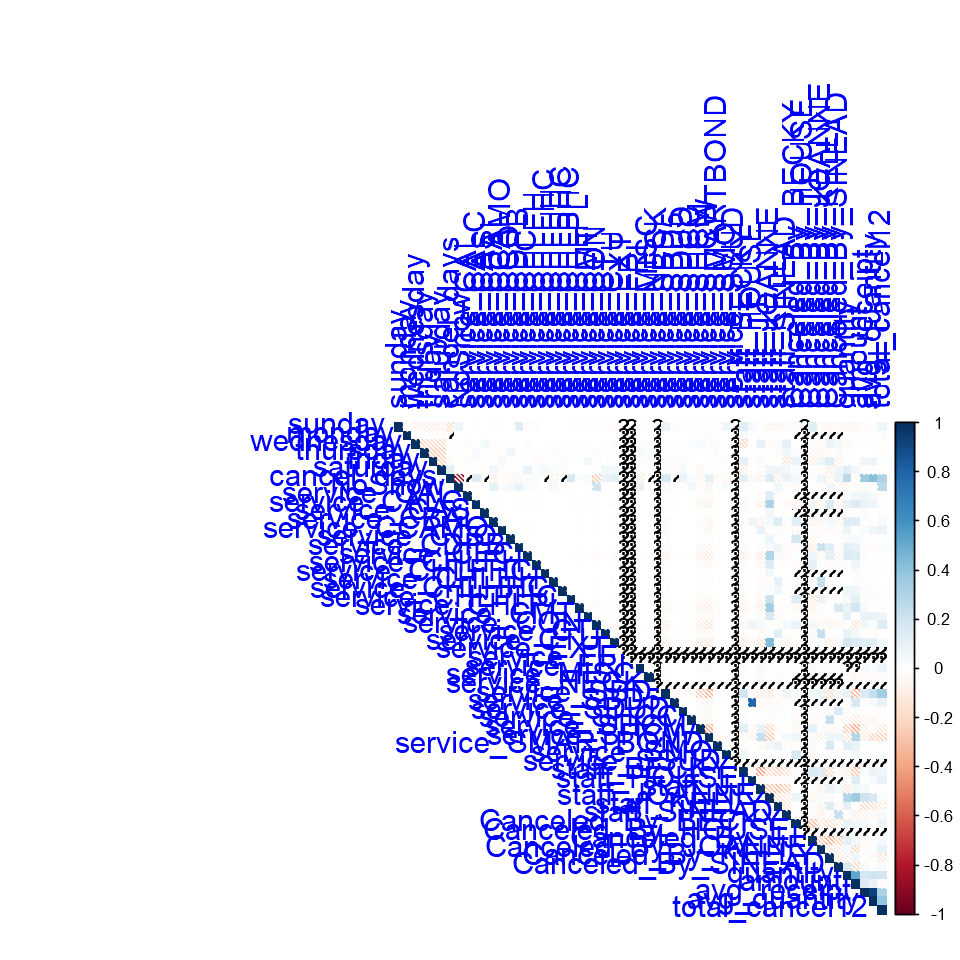

In [575]:
corrplot(res, method = "shade",type = "upper", is.corr = TRUE,tl.cex=1.5,tl.col = "Blue", tl.srt = 90, na.rm = TRUE)


## Outliers

In [13]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- setdiff(names(data),"Client_Code")
    outdata <- data.frame(Client_Code=data$Client_Code)
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median (data[[v]],na.rm=TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[(v)] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

df_outliers <- outlierMatrix(df)

In [14]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Client_Code,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,NoShow,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0,0,0,0,1,0,NA,0,1,...,NA,NA,NA,NA,NA,NA,NA,0,0,0
2,NA,0,0,0,0,1,0,0,NA,0,...,NA,NA,NA,NA,NA,NA,NA,0,0,0
3,.L01,0,0,1,0,0,0,0,NA,0,...,NA,NA,NA,NA,NA,0,1,0,0,0
4,.L01,0,0,1,0,0,0,0,NA,0,...,NA,NA,NA,NA,NA,0,1,0,0,0
5,.L01,0,0,1,0,0,0,NA,0,0,...,0,0,0,1,0,NA,NA,1,0,0
6,.L01,0,0,1,0,0,0,0,NA,0,...,NA,NA,NA,NA,NA,NA,NA,1,0,0


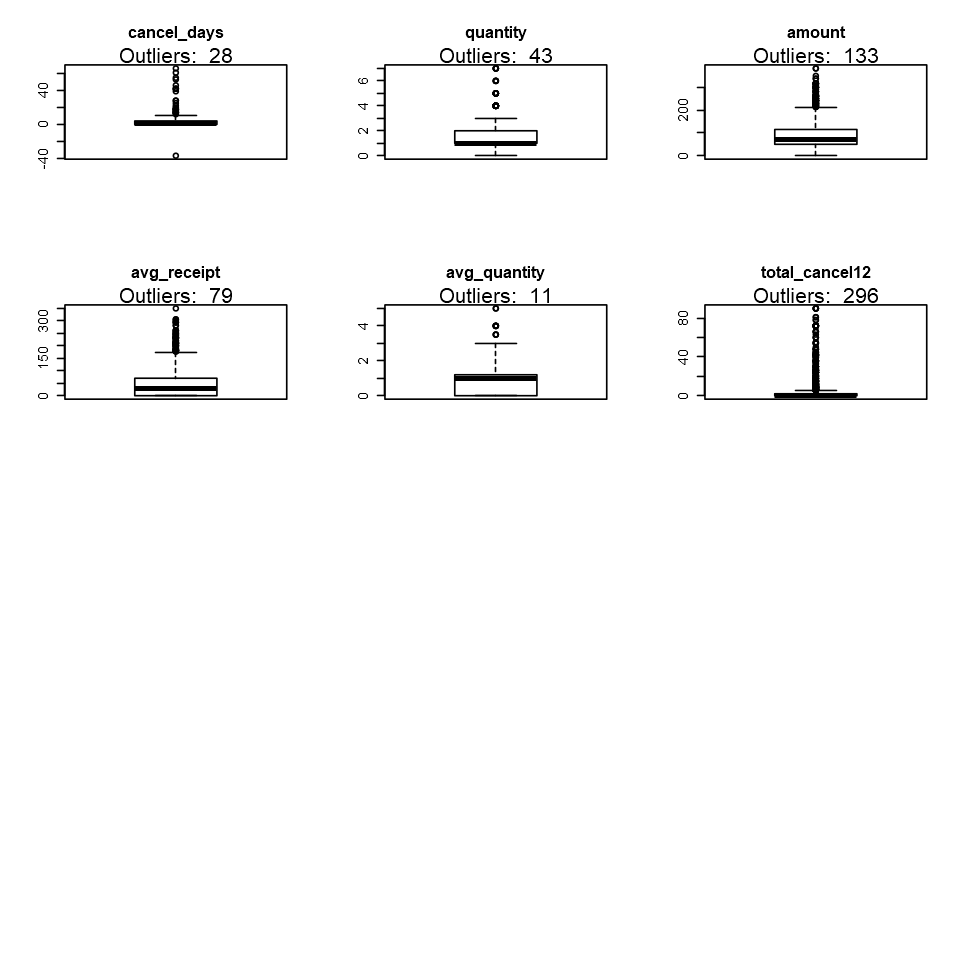

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(NOSHOW_continuousV[,1:6])) {
    outlier_values <- boxplot.stats(NOSHOW_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

## Missingness

In [16]:
getMissingness(df)

list(var = c(50, 51, 52, 53, 54, 55, 10, 56, 57, 9), na_count = c(1967, 1967, 1967, 1967, 1967, 1967, 1909, 470, 470, 276), rate = c(90.1, 90.1, 90.1, 90.1, 90.1, 90.1, 87.4, 21.5, 21.5, 12.6))This dataset has 0 (0%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
Canceled_By_BECKY,1967,90.1
Canceled_By_HOUSE,1967,90.1
Canceled_By_JJ,1967,90.1
Canceled_By_JOANNE,1967,90.1
Canceled_By_KELLY,1967,90.1
Canceled_By_SINEAD,1967,90.1
cancel_days,1909,87.4
quantity,470,21.5
amount,470,21.5


In [17]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"Client_Code")
    missdata <- data.frame(Client_Code=data$Client_Code)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
head(df_missing)

,Client_Code,Booking_Date,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,NA,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,0
3,.L01,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,0,0,0,0,0
4,.L01,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,0,0,0,0,0
5,.L01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,.L01,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,0


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


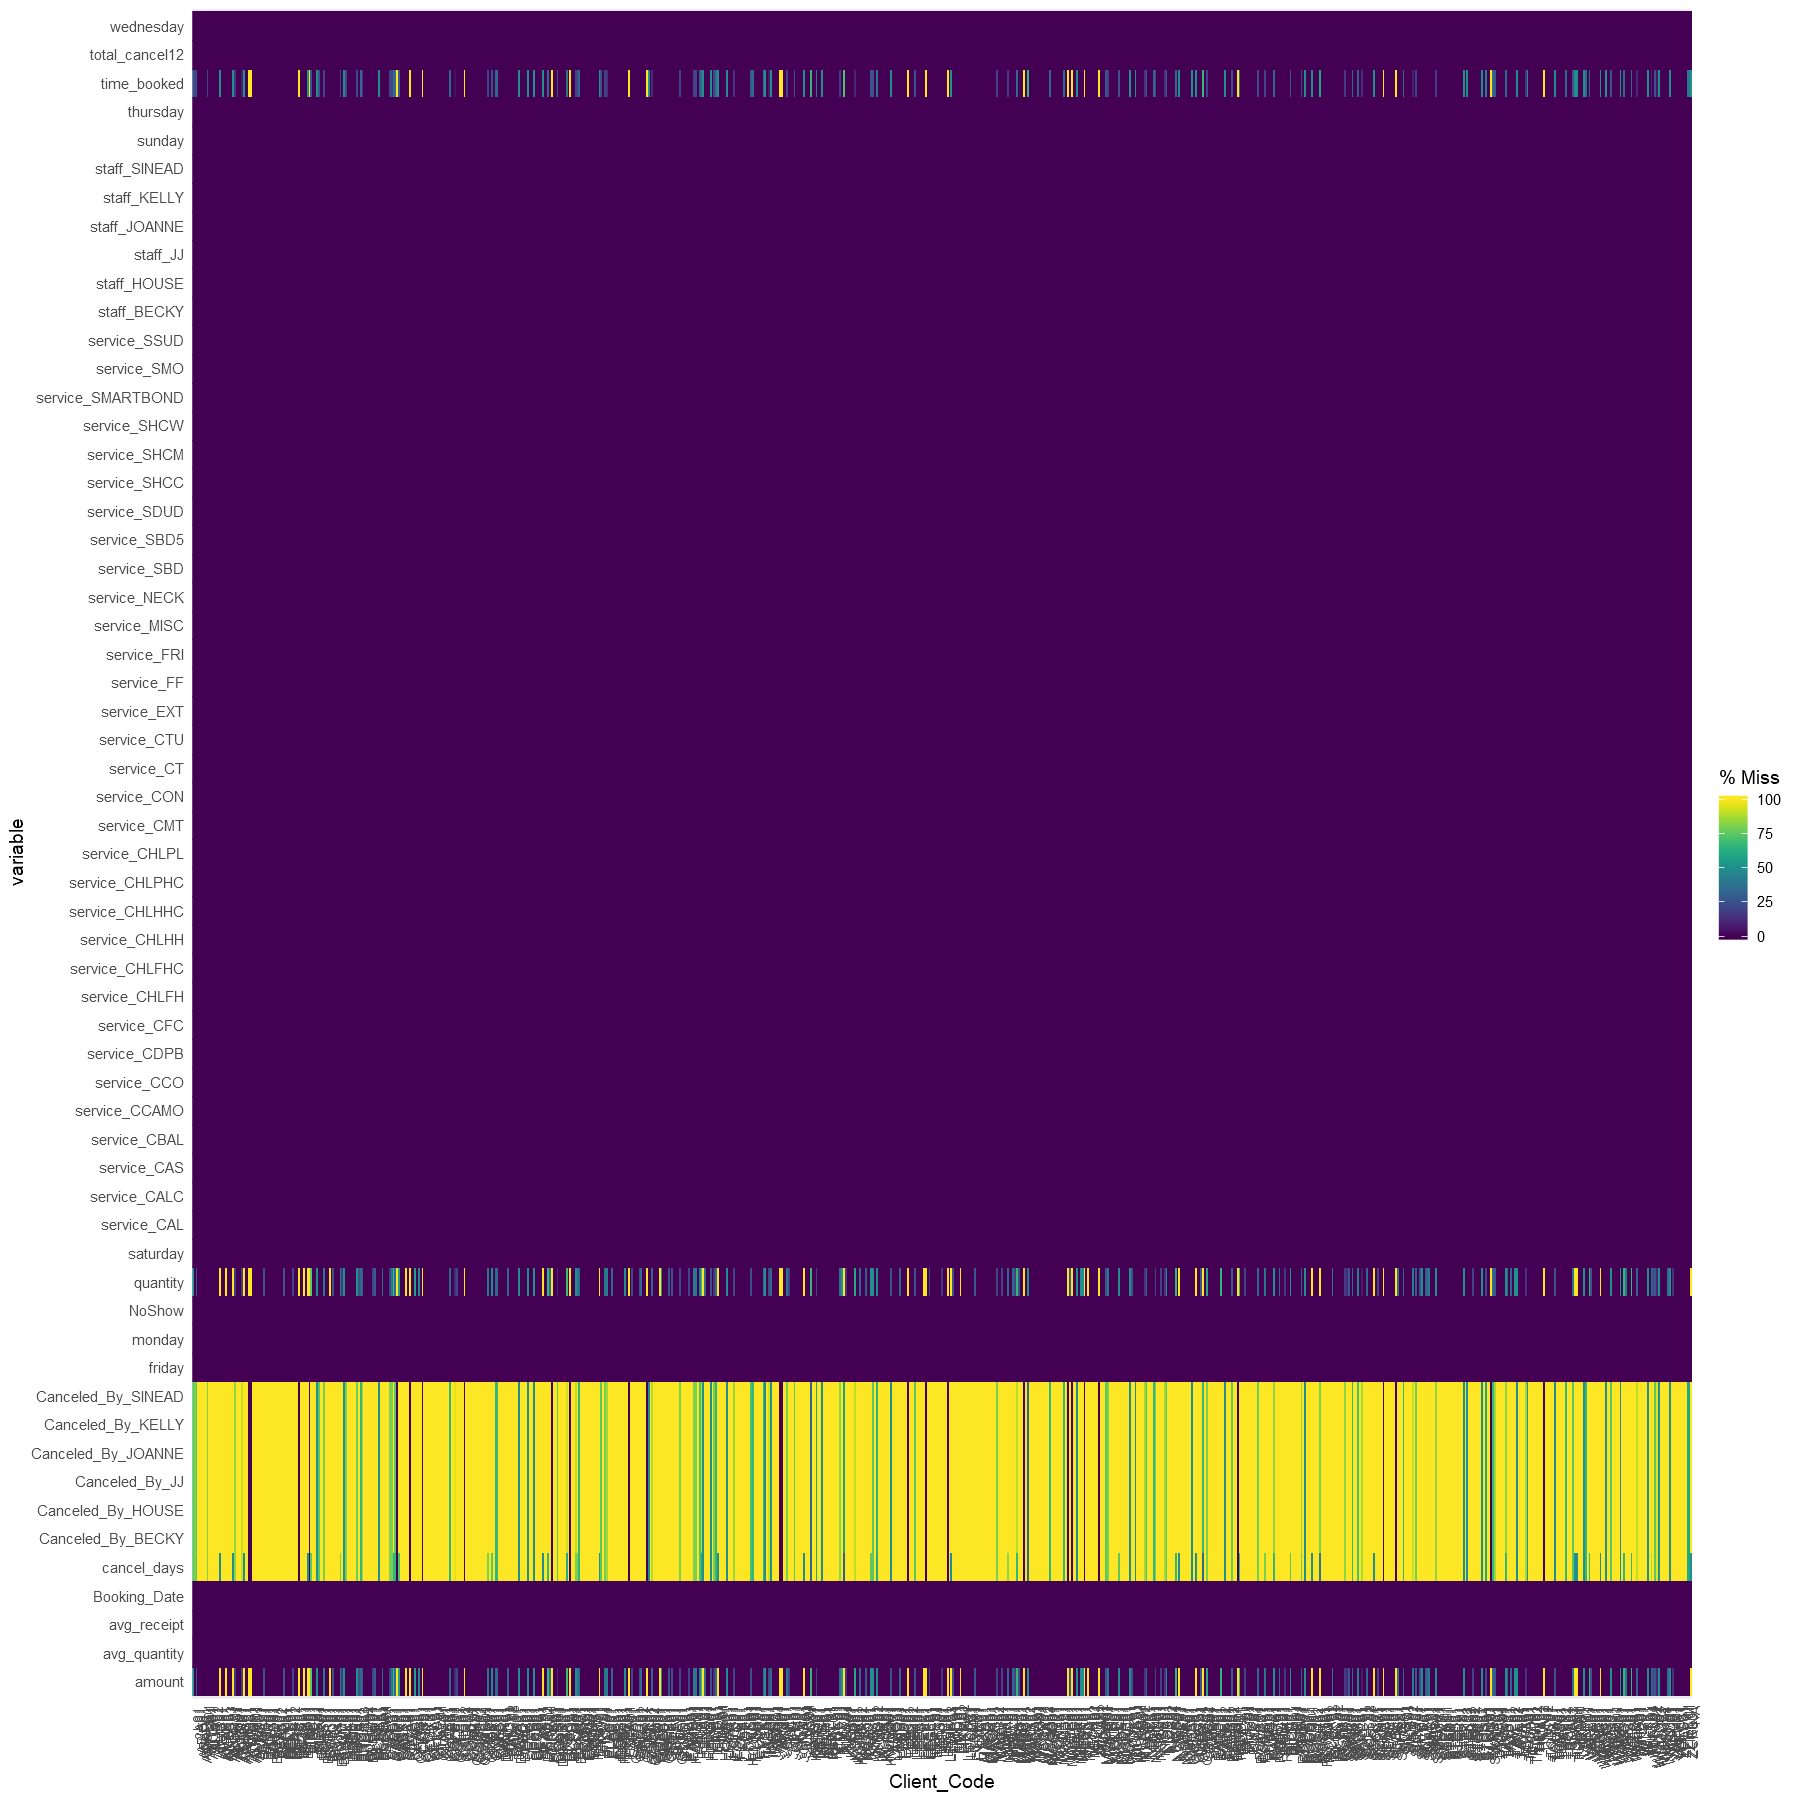

In [18]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Client_Code) + 
theme(axis.text.x = element_text(angle=90, size=8))

# Data Cleansing

## Outliers

### For the variables where outliers were found, checking the distribution with(blue) / without outliers(red)

#### cancel_days outliers

[1] 13 18 18 39 42 20

[1] -37

[1] 66

[1] 28

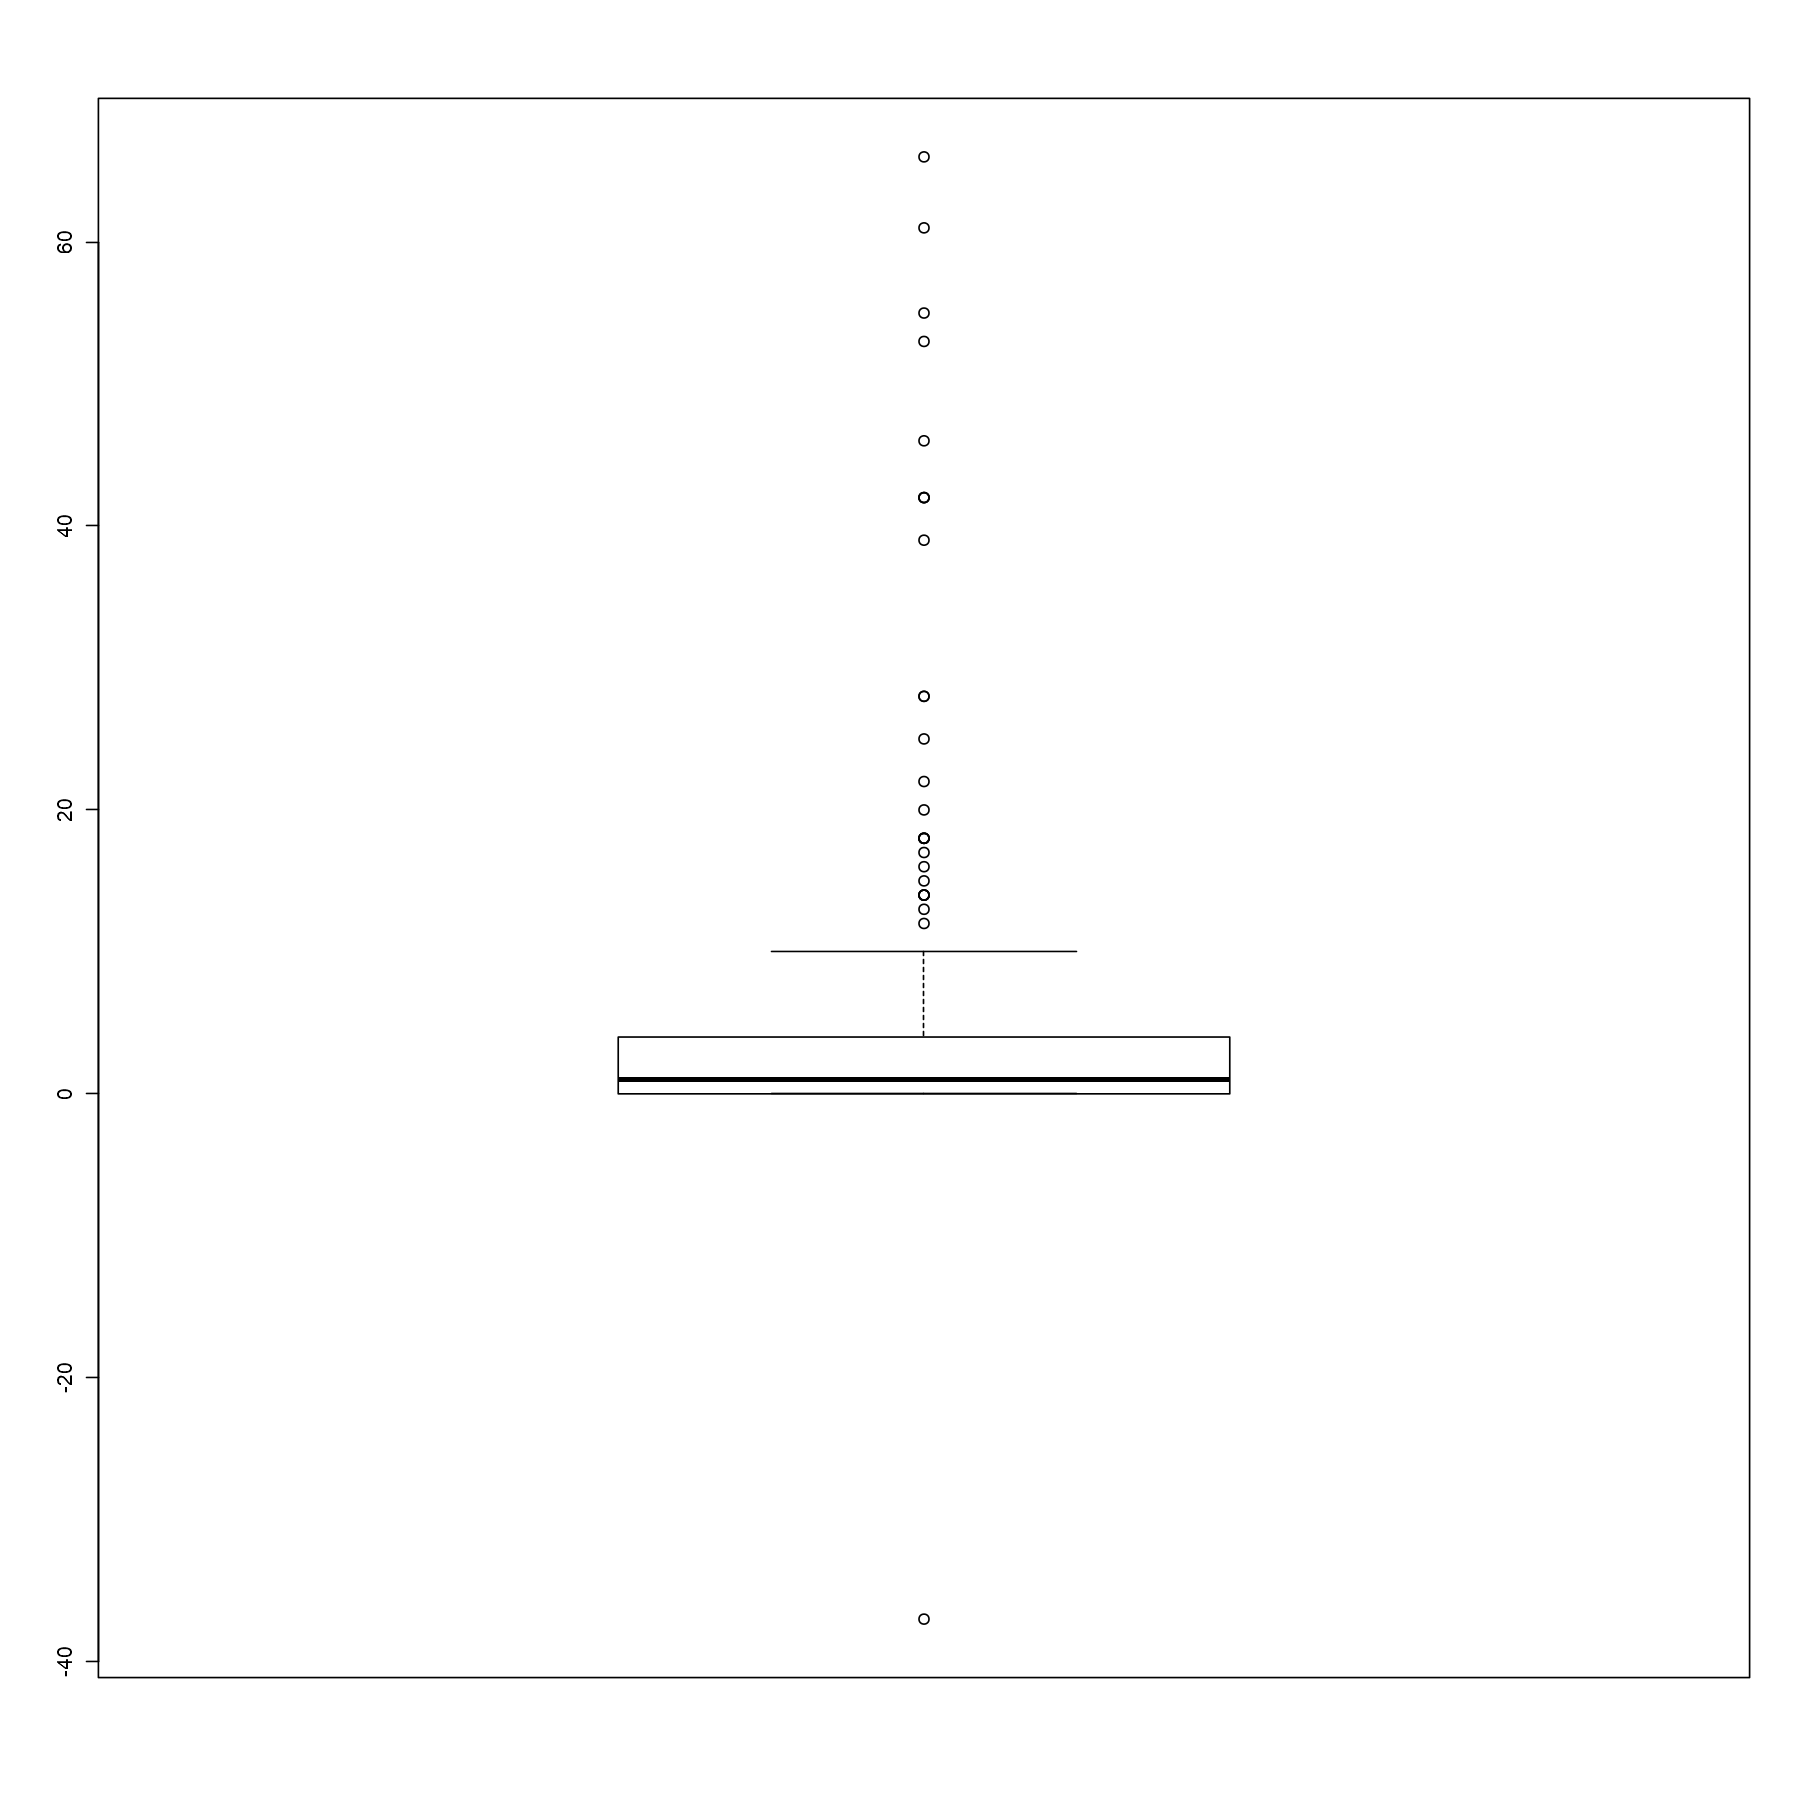

In [19]:
cancel_days_out  <- boxplot(df$cancel_days)
head(cancel_days_out$out) # outlier
min(cancel_days_out$out) #  minimum outlier
max(cancel_days_out$out)
length(cancel_days_out$out)

In [20]:
cancel_days.out <- ifelse(df[["cancel_days"]] > 11 | df[["cancel_days"]] < 0, 1, 0)
table(cancel_days.out)

cancel_days.out
  0   1 
247  28 

In [21]:
cancel_days.noout <- df[["cancel_days"]]
cancel_days.noout <- ifelse(cancel_days.out==1,NA,cancel_days.noout)
head(cancel_days.noout)

[1]  0 NA NA NA  5 NA

Warning message:
"Removed 1909 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 1937 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 1909 rows containing non-finite values (stat_density)."
Warning message:
"Removed 1937 rows containing non-finite values (stat_density)."


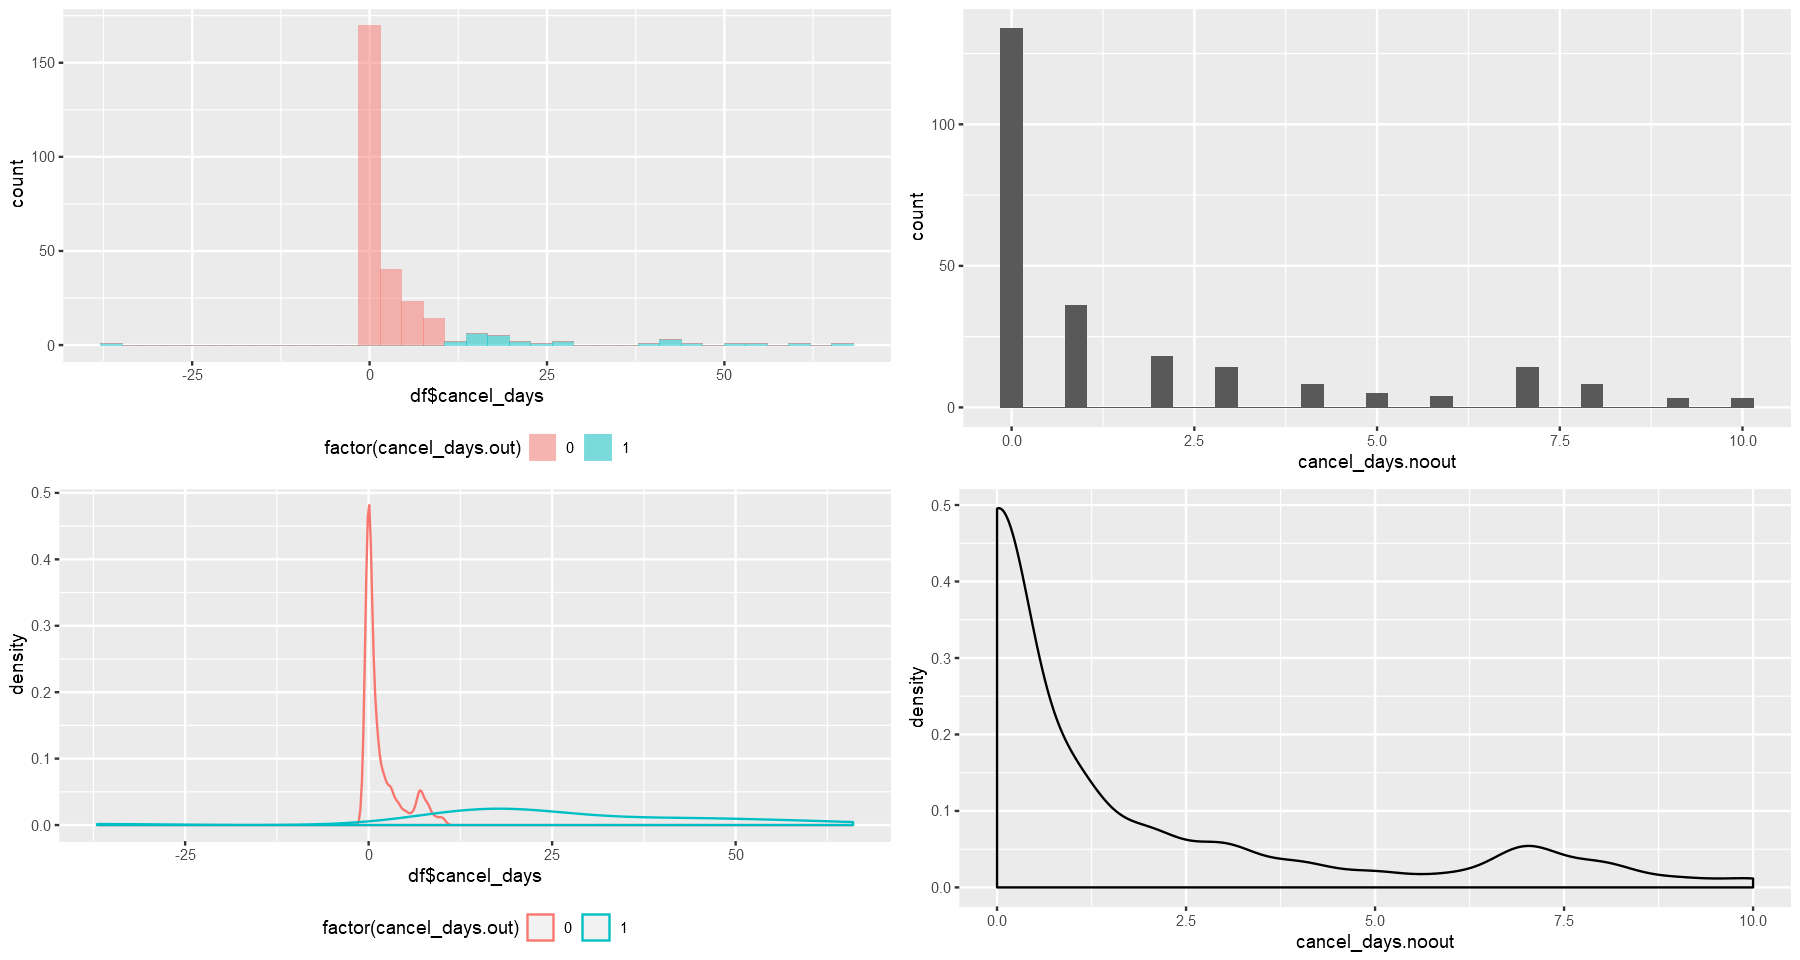

In [22]:
p1 <- ggplot() + geom_histogram(aes(x=df$cancel_days, fill=factor(cancel_days.out)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=cancel_days.noout),bins=35)
p3 <- ggplot (df,aes(x=df$cancel_days, group = factor(cancel_days.out), color = factor(cancel_days.out))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=cancel_days.noout)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [23]:
t.test(cancel_days.out,cancel_days.noout)


	Welch Two Sample t-test

data:  cancel_days.out and cancel_days.noout
t = -9.4164, df = 251.95, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.903555 -1.245035
sample estimates:
mean of x mean of y 
0.1018182 1.6761134 


In [24]:
mod1 <- glm(df$NoShow ~ df$cancel_days,family='binomial')
pred1 <- predict(mod1,newdata=df,type="response")
mod2 <- glm(df$NoShow ~ cancel_days.noout,family='binomial')
pred2 <- predict(mod2,newdata=df,type="response")

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


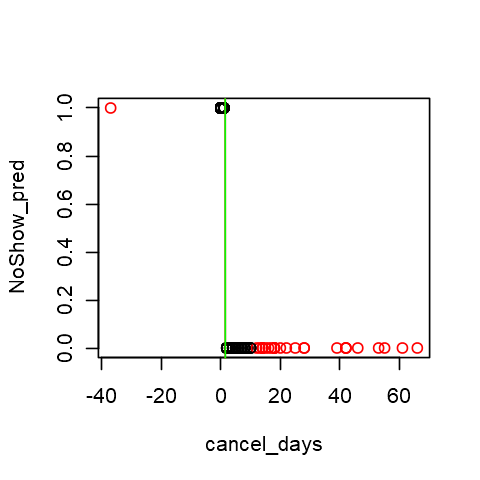

In [25]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$cancel_days, pred1, col=factor(cancel_days.out),xlab="cancel_days",ylab="NoShow_pred")
abline(mod1, col="red") 
abline(mod2, col="green")

In [26]:
table (df$NoShow, ifelse(pred1>0.015,1,0))
table (df$NoShow, ifelse(pred2>0.015,1,0))

   
      0   1
  0 104   0
  1   0 171

   
      0   1
  0  77   0
  1   0 170

#### quantity outliers

[1] 4 4 4 4 4 4

[1] 4

[1] 7

[1] 43

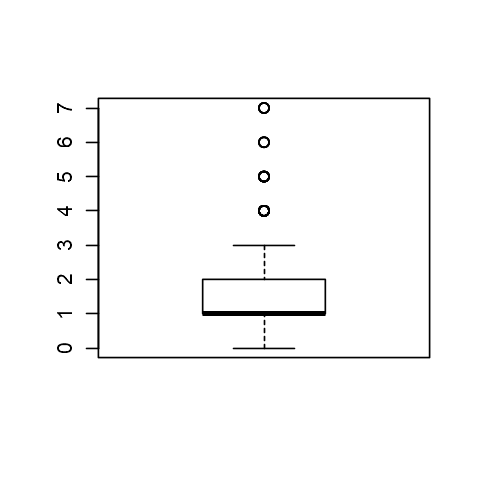

In [27]:
quantity_out  <- boxplot(df$quantity)
head(quantity_out$out) # outlier
min(quantity_out$out) #  minimum outlier
max(quantity_out$out)
length(quantity_out$out)

In [28]:
quantity.out <- ifelse(df[["quantity"]] >3 , 1, 0)
table(quantity.out)

quantity.out
   0    1 
1671   43 

In [29]:
quantity.noout <- df[["quantity"]]
quantity.noout <- ifelse(quantity.out==1,NA,quantity.noout)
head(quantity.noout)

[1] NA NA  2  2 NA NA

Warning message:
"Removed 470 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 513 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 470 rows containing non-finite values (stat_density)."
Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


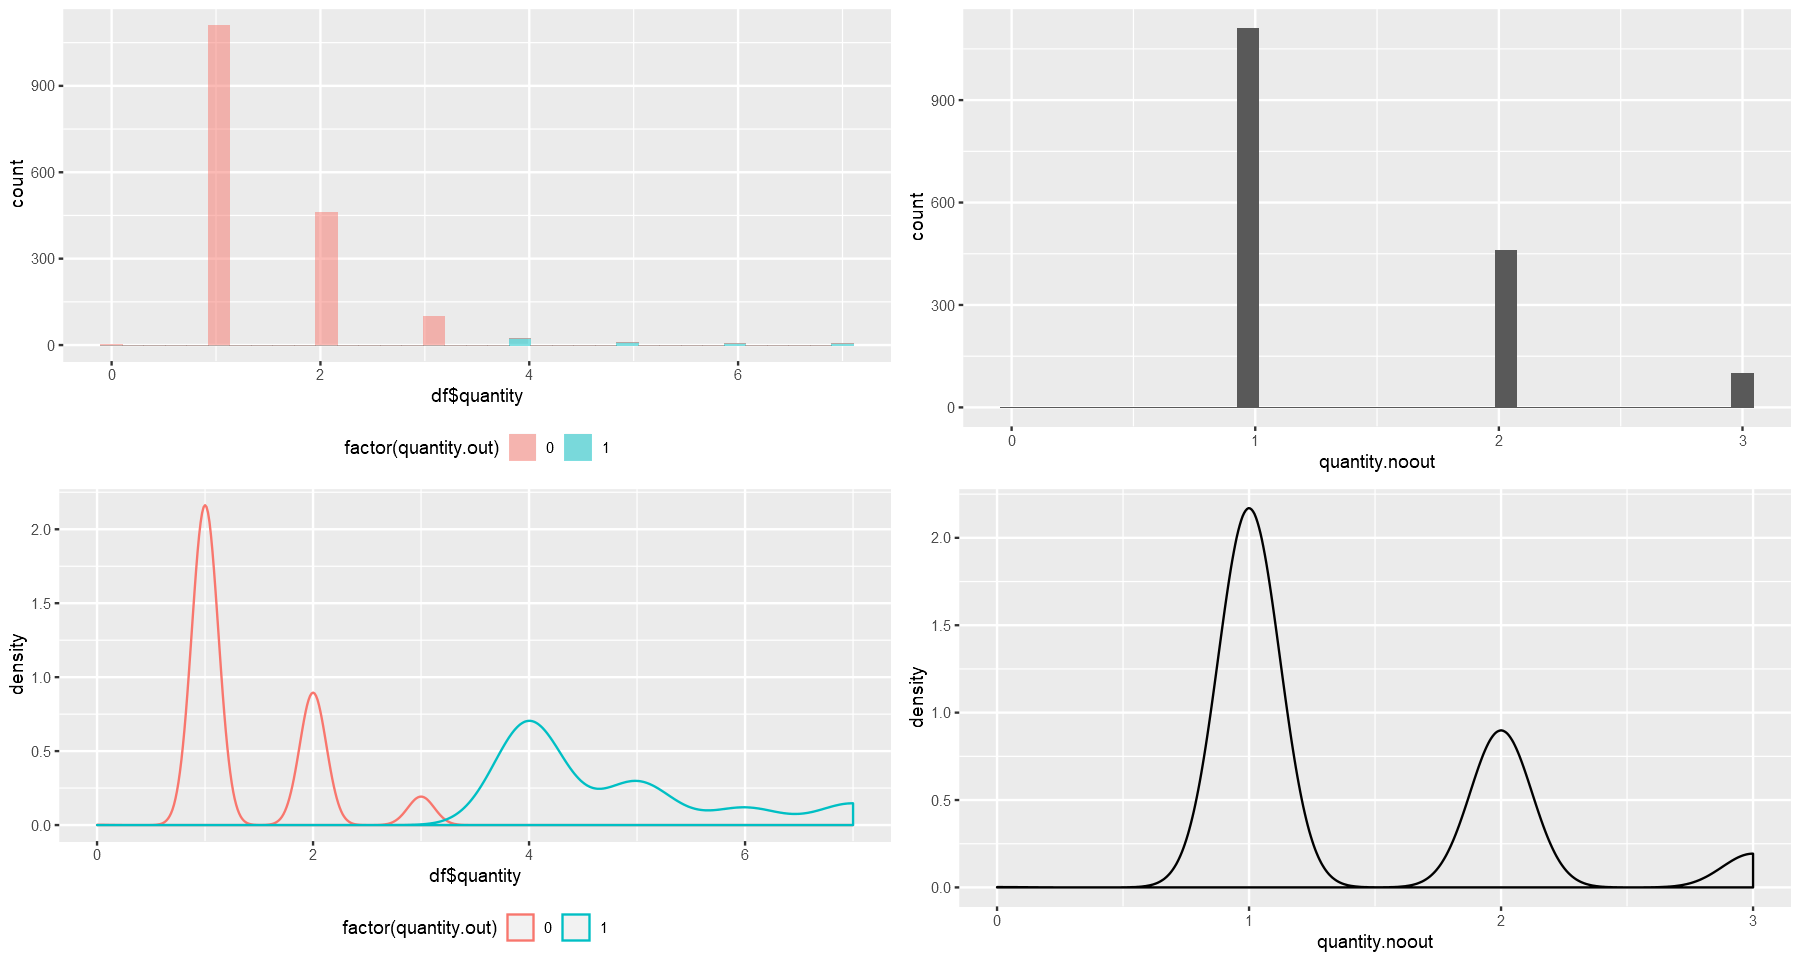

In [30]:
p1 <- ggplot() + geom_histogram(aes(x=df$quantity, fill=factor(quantity.out)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=quantity.noout),bins=35)
p3 <- ggplot (df,aes(x=df$quantity, group = factor(quantity.out), color = factor(quantity.out))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=quantity.noout)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [31]:
t.test(quantity.out,quantity.noout)


	Welch Two Sample t-test

data:  quantity.out and quantity.noout
t = -90.442, df = 1891.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.397757 -1.338424
sample estimates:
 mean of x  mean of y 
0.02508751 1.39317774 


In [32]:
mod3 <- glm(df$NoShow ~ df$quantity,family='binomial')
pred3 <- predict(mod3,newdata=df,type="response")
mod4 <- glm(df$NoShow ~ quantity.noout,family='binomial')
pred4 <- predict(mod4,newdata=df,type="response")

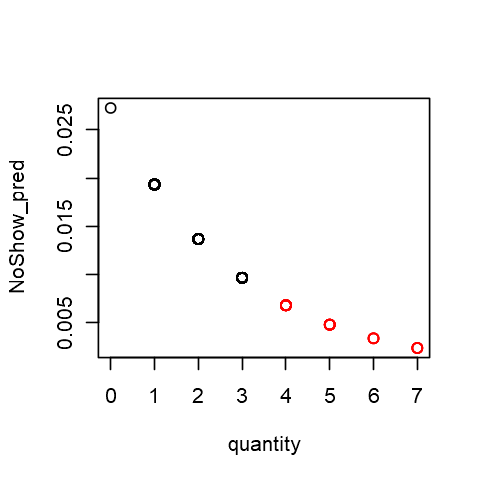

In [33]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$quantity, pred3, col=factor(quantity.out),xlab="quantity",ylab="NoShow_pred")
abline(mod3, col="red") 
abline(mod4, col="green")

In [34]:
table (df$NoShow, ifelse(pred3>0.015,1,0))
table (df$NoShow, ifelse(pred4>0.015,1,0))

   
       0    1
  0  597 1088
  1    5   24

   
       0    1
  0  555 1088
  1    4   24

#### amount outliers

[1] 262 262 230 265 265 265

[1] 214.1

[1] 382.8

[1] 133

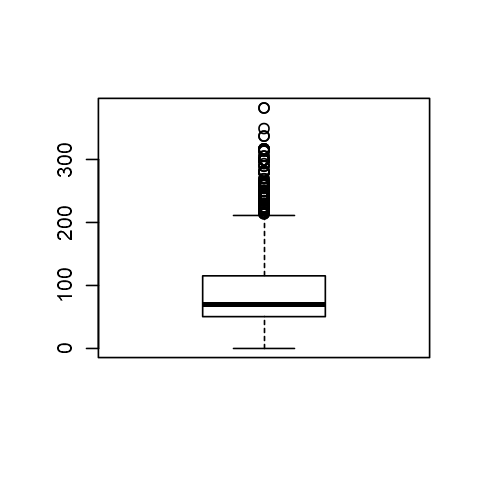

In [35]:
amount_out  <- boxplot(df$amount)
head(amount_out$out) # outlier
min(amount_out$out) #  minimum outlier
max(amount_out$out)
length(amount_out$out)

In [36]:
amount.out <- ifelse(df[["amount"]] >214 , 1, 0)
table(amount.out)

amount.out
   0    1 
1581  133 

In [37]:
amount.noout <- df[["amount"]]
amount.noout <- ifelse(amount.out==1,NA,amount.noout)
head(amount.noout)

[1] NA NA NA NA NA NA

Warning message:
"Removed 470 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 603 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 470 rows containing non-finite values (stat_density)."
Warning message:
"Removed 603 rows containing non-finite values (stat_density)."


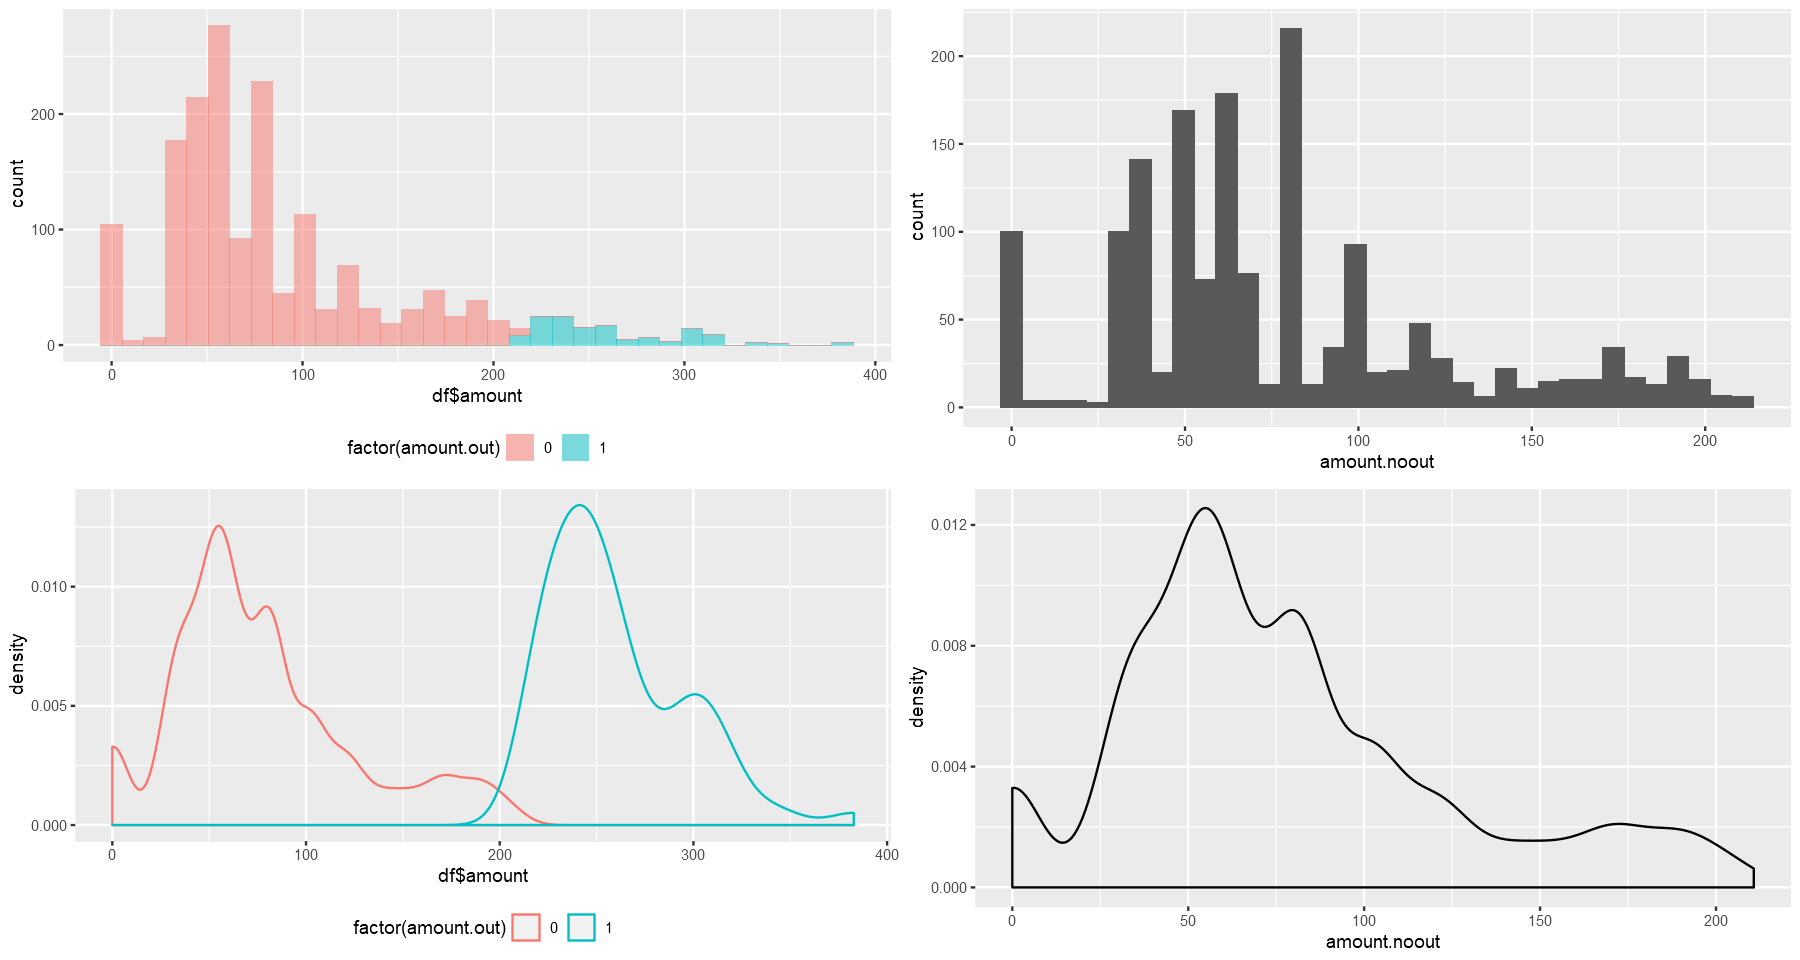

In [38]:
p1 <- ggplot() + geom_histogram(aes(x=df$amount, fill=factor(amount.out)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=amount.noout),bins=35)
p3 <- ggplot (df,aes(x=df$amount, group = factor(amount.out), color = factor(amount.out))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=amount.noout)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [39]:
t.test(amount.out,amount.noout)


	Welch Two Sample t-test

data:  amount.out and amount.noout
t = -64.018, df = 1580.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -79.27204 -74.55877
sample estimates:
  mean of x   mean of y 
 0.07759627 76.99300443 


In [40]:
mod5 <- glm(df$NoShow ~ df$amount,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ amount.noout,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

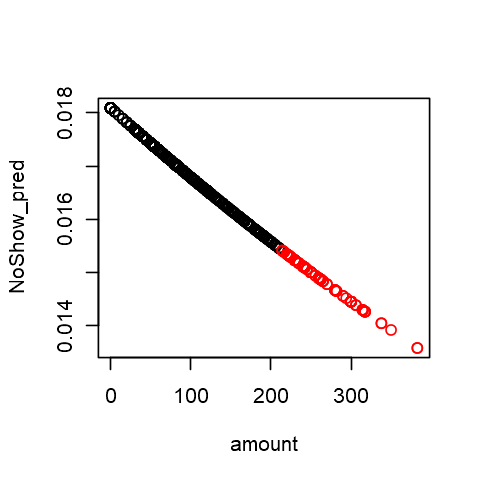

In [41]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$amount, pred5, col=factor(amount.out),xlab="amount",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [42]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    0    1
     0   58 1627
     1    2   27

      pred
Noshow    0    1
     0  462 1093
     1    4   22

#### avg_receipt outliers

[1] 262.0 262.0 230.0 282.0 182.0 182.5

[1] 177.41

[1] 350

[1] 79

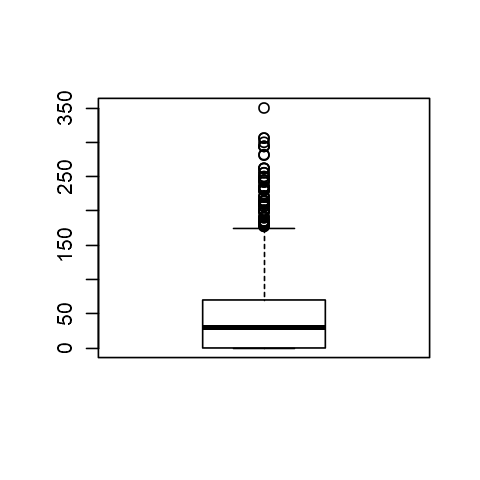

In [43]:
avg_receipt_out  <- boxplot(df$avg_receipt)
head(avg_receipt_out$out) # outlier
min(avg_receipt_out$out) #  minimum outlier
max(avg_receipt_out$out)
length(avg_receipt_out$out)

In [44]:
avg_receipt.out <- ifelse(df[["avg_receipt"]] >177 , 1, 0)
table(avg_receipt.out)

avg_receipt.out
   0    1 
2105   79 

In [45]:
avg_receipt.noout <- df[["avg_receipt"]]
avg_receipt.noout <- ifelse(avg_receipt.out==1,NA,avg_receipt.noout)
head(avg_receipt.noout)

[1]  0  0  0  0 NA NA

Warning message:
"Removed 79 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 79 rows containing non-finite values (stat_density)."


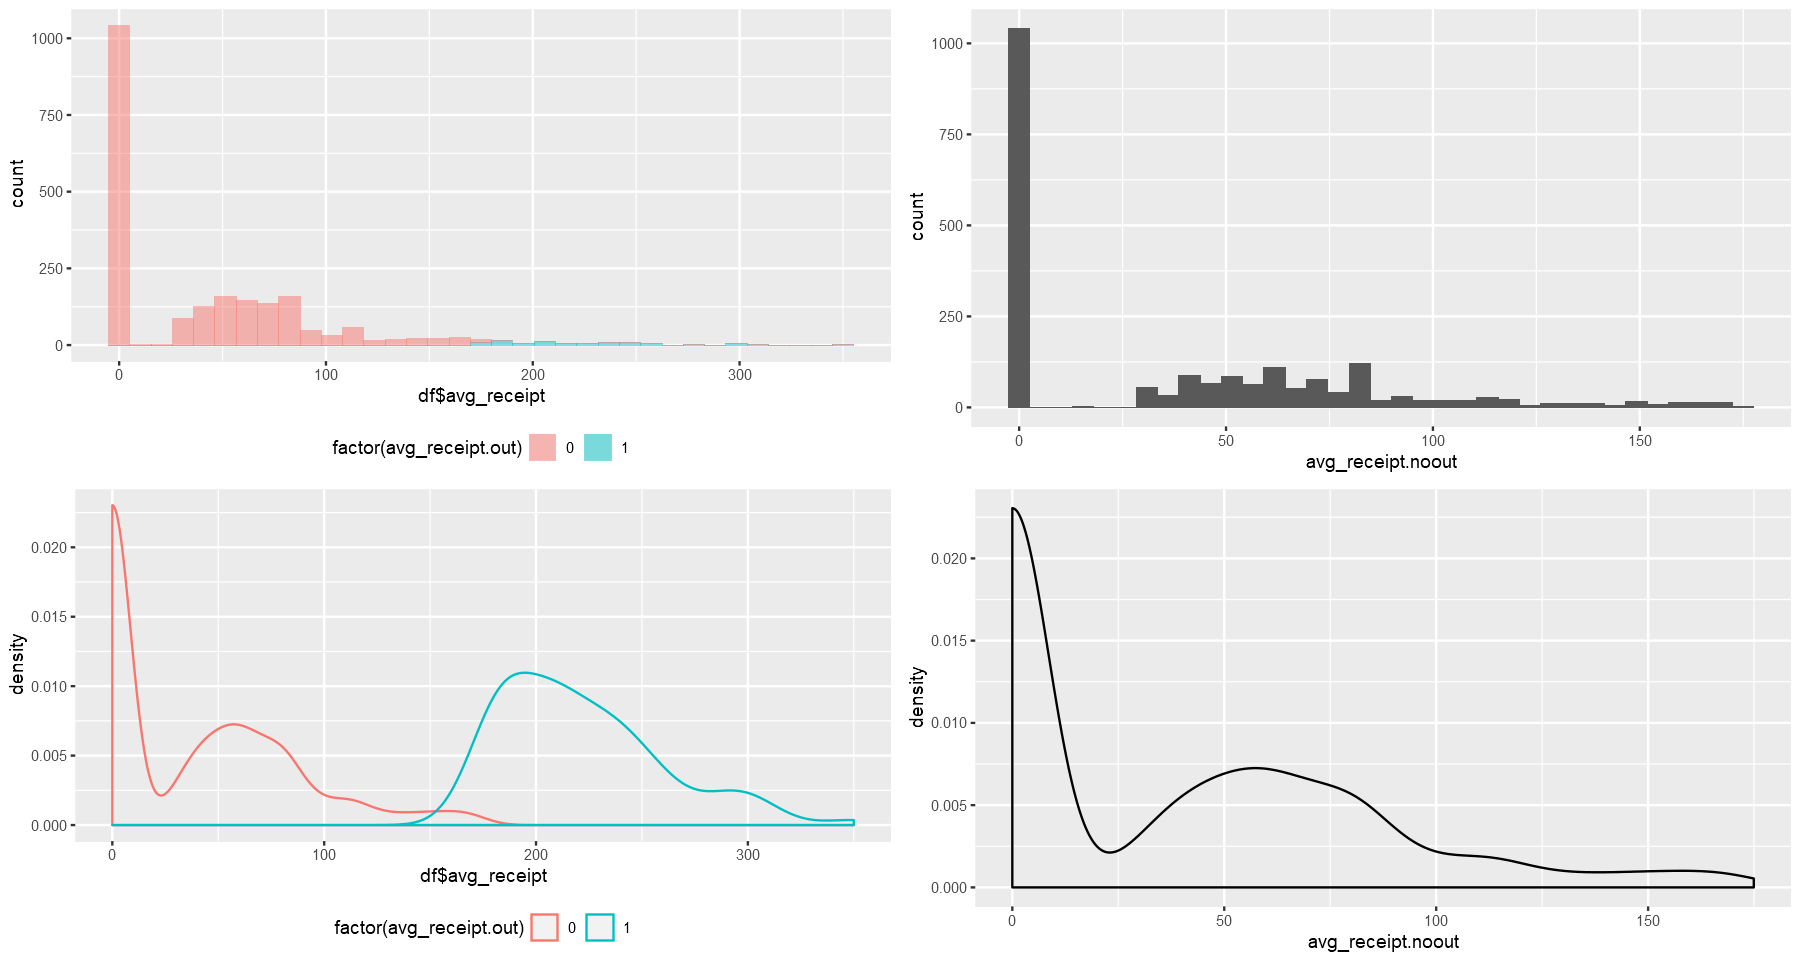

In [46]:
p1 <- ggplot() + geom_histogram(aes(x=df$avg_receipt, fill=factor(avg_receipt.out)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=avg_receipt.noout),bins=35)
p3 <- ggplot (df,aes(x=df$avg_receipt, group = factor(avg_receipt.out), color = factor(avg_receipt.out))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=avg_receipt.noout)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [47]:
t.test(avg_receipt.out,avg_receipt.noout)


	Welch Two Sample t-test

data:  avg_receipt.out and avg_receipt.noout
t = -38.79, df = 2104.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -39.11203 -35.34758
sample estimates:
  mean of x   mean of y 
 0.03617216 37.26597711 


In [48]:
mod7 <- glm(df$NoShow ~ df$avg_receipt,family='binomial')
pred7 <- predict(mod7,newdata=df,type="response")
mod8 <- glm(df$NoShow ~ avg_receipt.noout,family='binomial')
pred8 <- predict(mod8,newdata=df,type="response")

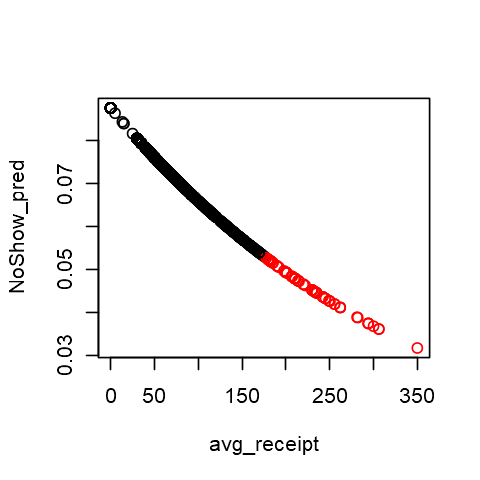

In [49]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$avg_receipt, pred7, col=factor(avg_receipt.out),xlab="avg_receipt",ylab="NoShow_pred")
abline(mod7, col="red") 
abline(mod8, col="green")

In [50]:
table (Noshow=df$NoShow, pred=ifelse(pred7>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred8>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1937
     1  168

#### avg_quantity outliers

[1] 4.0 5.0 5.0 3.5 3.5 3.5

[1] 3.5

[1] 5

[1] 11

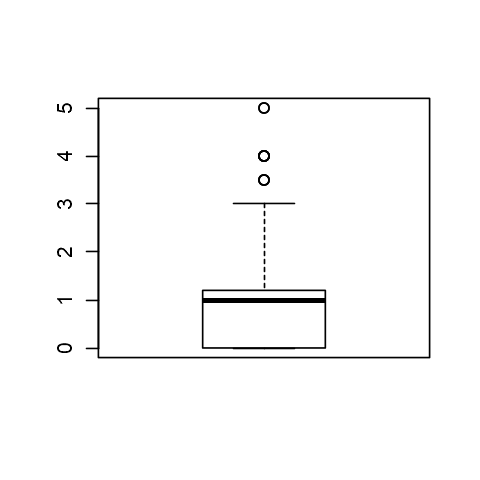

In [51]:
avg_quantity_out  <- boxplot(df$avg_quantity)
head(avg_quantity_out$out) # outlier
min(avg_quantity_out$out) #  minimum outlier
max(avg_quantity_out$out)
length(avg_quantity_out$out)

In [52]:
avg_quantity.out <- ifelse(df[["avg_quantity"]] >3.4 , 1, 0)
table(avg_quantity.out)

avg_quantity.out
   0    1 
2173   11 

In [53]:
avg_quantity.noout <- df[["avg_quantity"]]
avg_quantity.noout <- ifelse(avg_quantity.out==1,NA,avg_quantity.noout)
head(avg_quantity.noout)

[1] 0 0 0 0 2 2

Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 11 rows containing non-finite values (stat_density)."


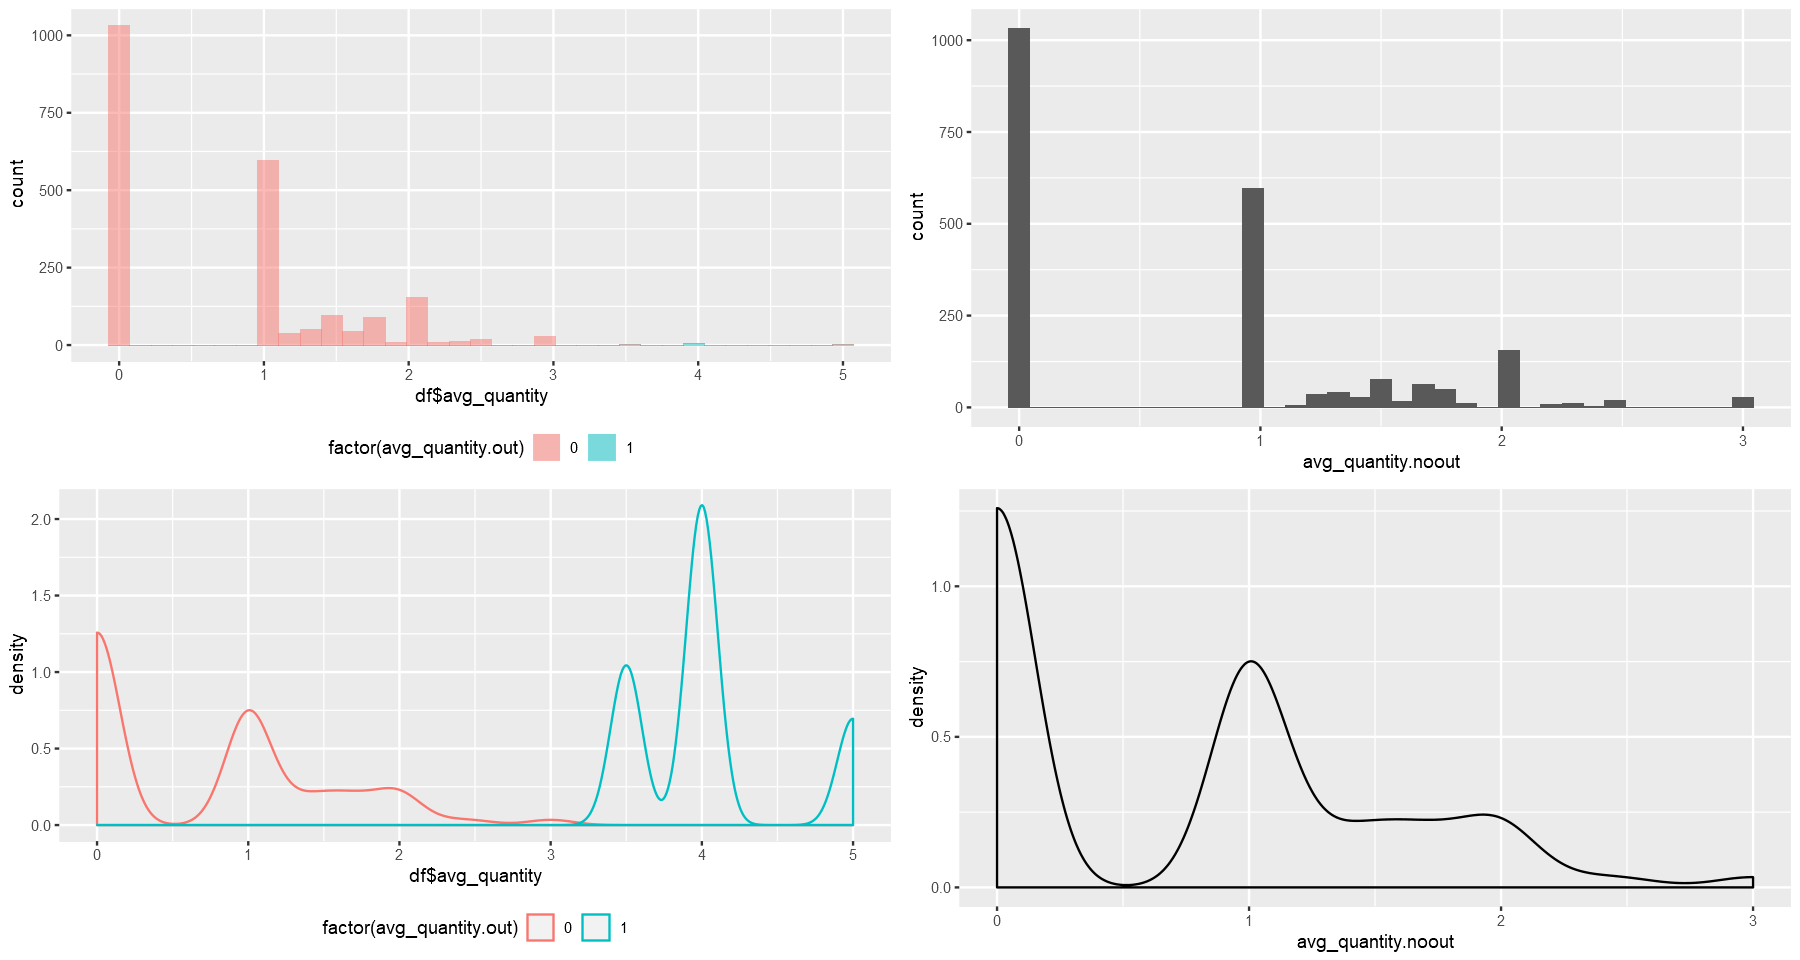

In [54]:
p1 <- ggplot() + geom_histogram(aes(x=df$avg_quantity, fill=factor(avg_quantity.out)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=avg_quantity.noout),bins=35)
p3 <- ggplot (df,aes(x=df$avg_quantity, group = factor(avg_quantity.out), color = factor(avg_quantity.out))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=avg_quantity.noout)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [55]:
t.test(avg_quantity.out,avg_quantity.noout)


	Welch Two Sample t-test

data:  avg_quantity.out and avg_quantity.noout
t = -42.991, df = 2207.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7527373 -0.6870609
sample estimates:
 mean of x  mean of y 
0.00503663 0.72493572 


In [56]:
mod9 <- glm(df$NoShow ~ df$avg_quantity,family='binomial')
pred9 <- predict(mod9,newdata=df,type="response")
mod10 <- glm(df$NoShow ~ avg_quantity.noout,family='binomial')
pred10 <- predict(mod10,newdata=df,type="response")

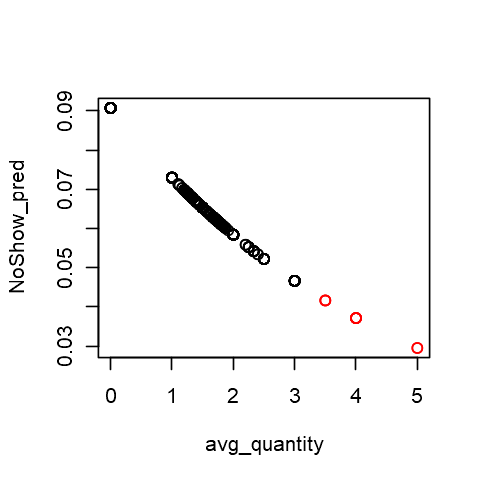

In [57]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$avg_quantity, pred9, col=factor(avg_quantity.out),xlab="avg_quantity",ylab="NoShow_pred")
abline(mod9, col="red") 
abline(mod10, col="green")

In [58]:
table (Noshow=df$NoShow, pred=ifelse(pred9>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred10>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 2002
     1  171

#### total_cancel12 outliers

[1]  6  7  7  6  6 12

[1] 6

[1] 90

[1] 296

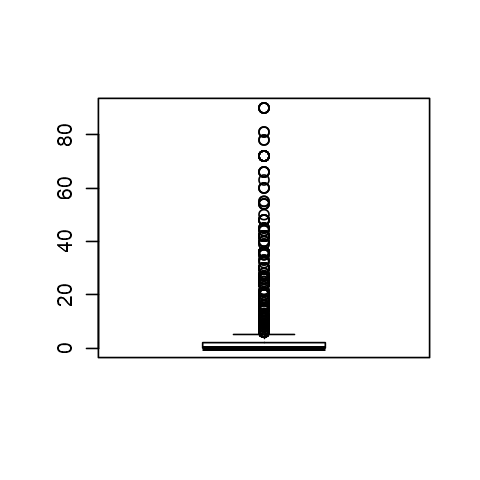

In [59]:
total_cancel12_out  <- boxplot(df$total_cancel12)
head(total_cancel12_out$out) # outlier
min(total_cancel12_out$out) #  minimum outlier
max(total_cancel12_out$out)
length(total_cancel12_out$out)

In [60]:
total_cancel12.out <- ifelse(df[["total_cancel12"]] >5 , 1, 0)
table(total_cancel12.out)

total_cancel12.out
   0    1 
1888  296 

In [61]:
total_cancel12.noout <- df[["total_cancel12"]]
total_cancel12.noout <- ifelse(total_cancel12.out==1,NA,total_cancel12.noout)
head(total_cancel12.noout)

[1] 0 0 1 1 1 1

Warning message:
"Removed 296 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 296 rows containing non-finite values (stat_density)."


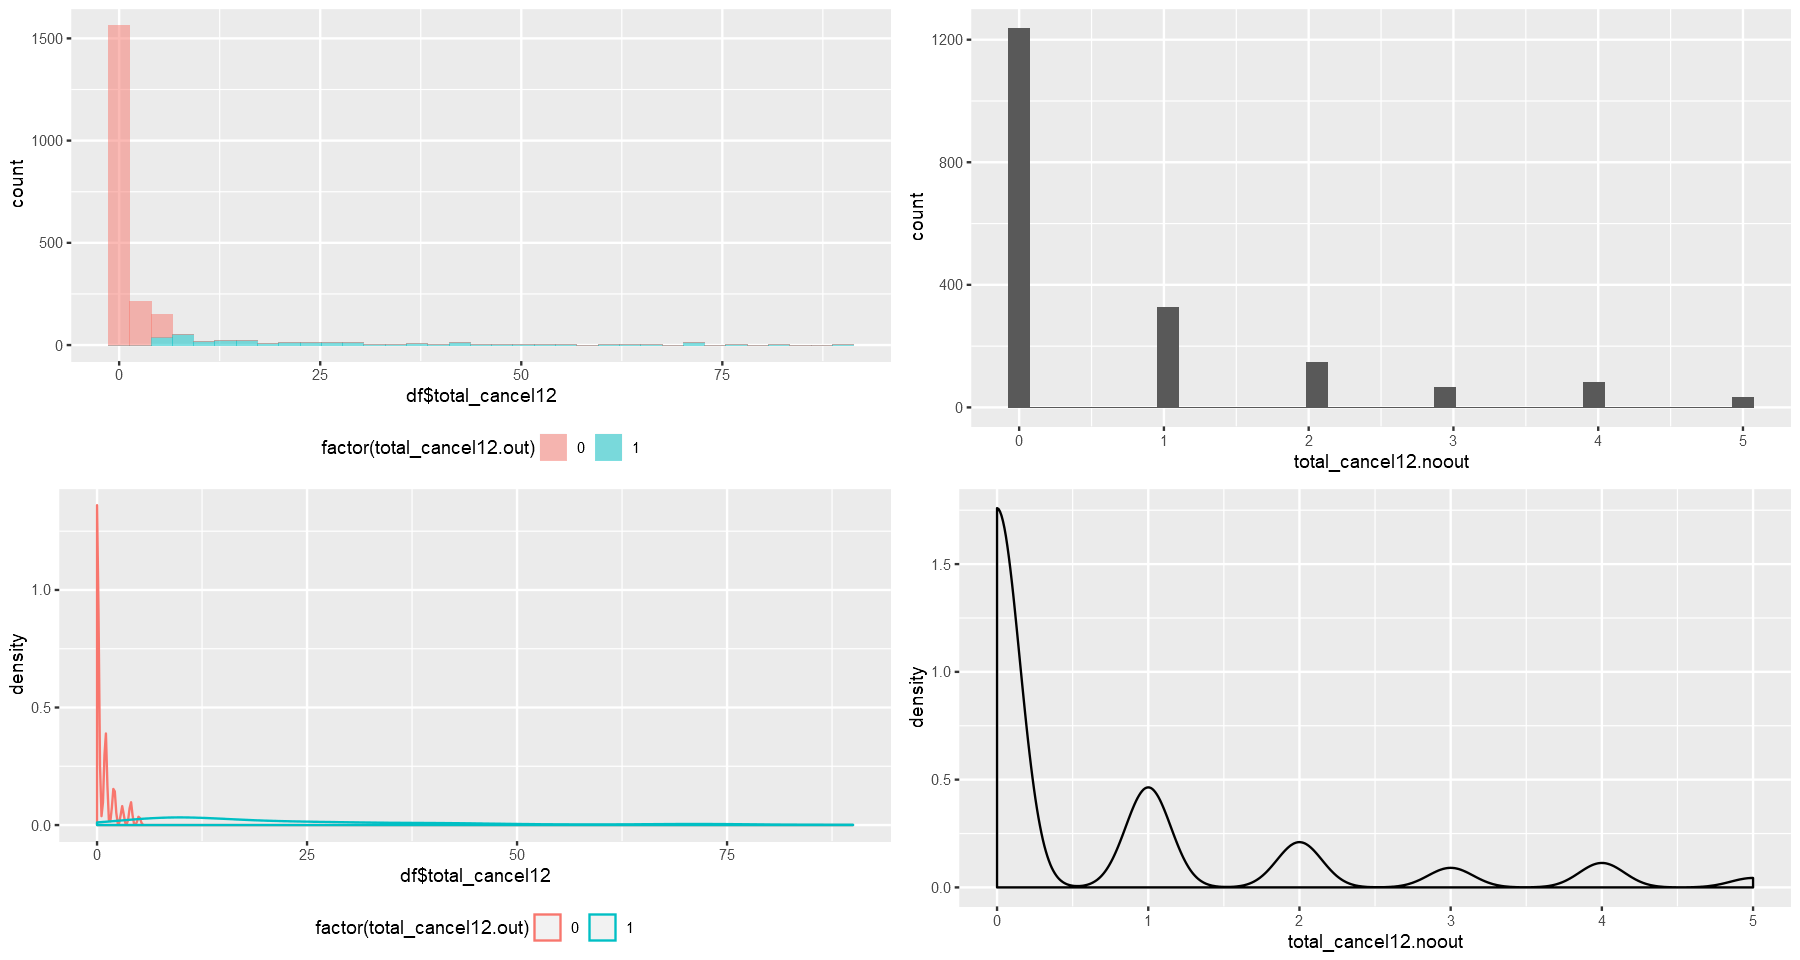

In [62]:
p1 <- ggplot() + geom_histogram(aes(x=df$total_cancel12, fill=factor(total_cancel12.out)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=total_cancel12.noout),bins=35)
p3 <- ggplot (df,aes(x=df$total_cancel12, group = factor(total_cancel12.out), color = factor(total_cancel12.out))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=total_cancel12.noout)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [63]:
t.test(total_cancel12.out,total_cancel12.noout)


	Welch Two Sample t-test

data:  total_cancel12.out and total_cancel12.noout
t = -19.332, df = 2157.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6032929 -0.4921702
sample estimates:
mean of x mean of y 
0.1355311 0.6832627 


In [64]:
mod11 <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred11 <- predict(mod11,newdata=df,type="response")
mod12 <- glm(df$NoShow ~ total_cancel12.noout,family='binomial')
pred12 <- predict(mod12,newdata=df,type="response")

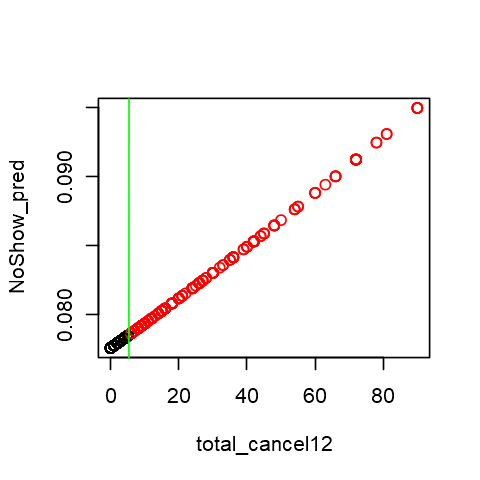

In [65]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$total_cancel12, pred11, col=factor(total_cancel12.out),xlab="total_cancel12",ylab="NoShow_pred")
abline(mod11, col="red") 
abline(mod12, col="green")

In [66]:
table (Noshow=df$NoShow, pred=ifelse(pred11>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred12>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1743
     1  145

### Table with variables having outliers.

לפי הגרפים למעלה ניתן לראות כי מחיקה של של ערכי קיצון תשנה את ההתפלגות של של הנתונים בחלק מהערכים , לכן במקרה כזה נעשה טרנספורמציה לנתונים, נבדוק את  הנתונים מחדש לאחר טרנספורמציה ונעדכן את הדאטה בהתאם 
במקרים בהם ההתפלגות והתוצאה לא משתנות ניתן למחוק את ערכי הקיצון ע"י שימוש בוקטור של החסרים 

| Variable                     | Treatment | Why                                                      |
|------------------------------|-----------|----------------------------------------------------------|
| cancel_days                  | Leave     | It changes both the assumption the results               |
| cancel_days =-37             | Drop      | A definite mistake. canceling after booking day passed   |
| quantity                     | Leave     | It changes both the assumption the results               |
| amount                       | Leave     | It changes both the assumption the results               |
| avg_recepit                  | Drop      | It changes the assumption but dosen't change the results |
| avg_quantity                 | Drop      | It changes the assumption but dosen't change the results |
| total_cancel12               | Leave     | It changes both the assumption the results               |

### Cleansed dataset for Outliers

#### Cleaning cancel_days - Droping cancel_days<0

In [67]:
df$cancel_days[which(df$cancel_days<0)]=NA

In [68]:
summary(df$cancel_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   1.000   4.321   4.000  66.000    1910 

In [69]:
df %>% select (cancel_days) %>% filter (cancel_days<0)

cancel_days
<dbl>


#### Categorizing cancel_days

Missin data in cancel_days is not MNAR, it has a high corraletion to NoShow 

In [70]:
table (df$cancel_days)


  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  20  22 
134  36  18  14   8   5   4  14   8   3   3   1   1   4   1   1   1   4   1   1 
 25  28  39  42  46  53  55  61  66 
  1   2   1   3   1   1   1   1   1 

In [71]:
df$cancel_days <- ifelse(is.na(df$cancel_days),'miss',
ifelse(df$cancel_days>=8,'8+',ifelse(df$cancel_days>=4,'4-7',as.character(df$cancel_days))))


In [72]:
table(df$cancel_days)


   0    1    2    3  4-7   8+ miss 
 134   36   18   14   31   41 1910 

#### Categorizing quantity

In [73]:
table(df$quantity)


   0    1    2    3    4    5    6    7 
   1 1111  460   99   24   10    4    5 

In [74]:
df$quantity <- ifelse(is.na(df$quantity),'miss',
ifelse(df$quantity>=5,'5-7',as.character(df$quantity)))
table(df$quantity)


   0    1    2    3    4  5-7 miss 
   1 1111  460   99   24   19  470 

#### Transforming amount

In [75]:
mod1a <- glm(df$NoShow ~ df$amount,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$amount+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$amount+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

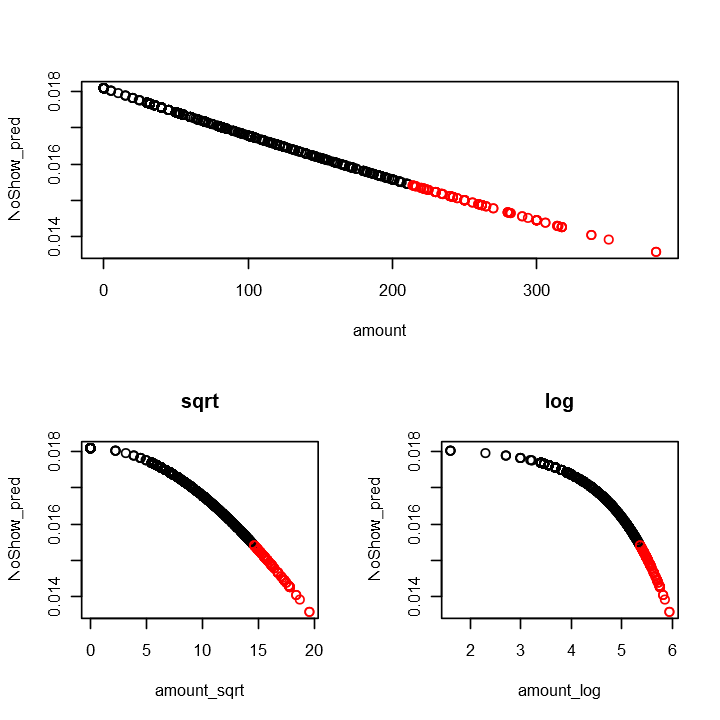

In [76]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$amount, pred5, col=factor(amount.out),xlab="amount",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$amount), pred5, col=factor(amount.out),xlab="amount_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$amount), pred5, col=factor(amount.out),xlab="amount_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

In [77]:
df$amount <- log(df$amount+1)

#### cleaning avg_recepit and avg_quantity

In [78]:
df$avg_receipt   <- avg_receipt.noout
df$avg_quantity  <- avg_quantity.noout

#### Transforming total_cancel12

In [79]:
mod1a <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$amount+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$amount+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

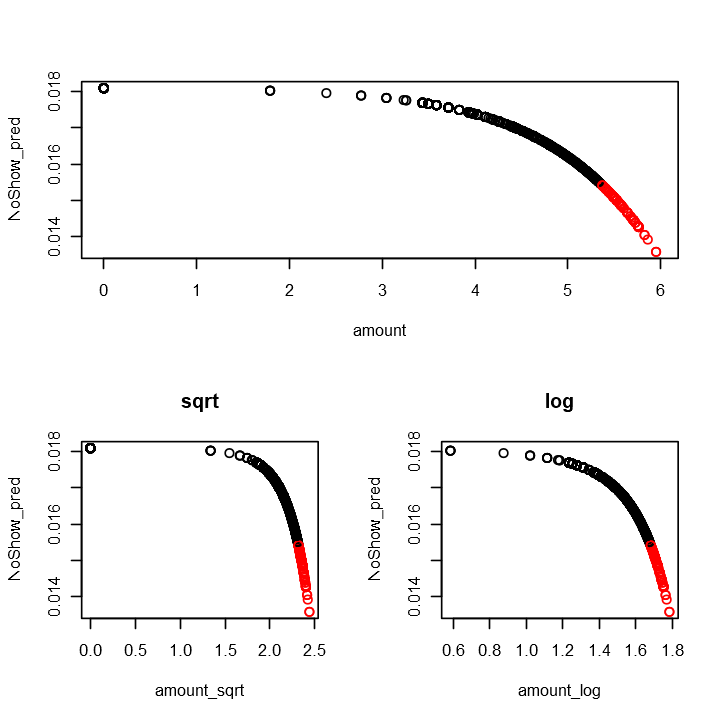

In [80]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$amount, pred5, col=factor(amount.out),xlab="amount",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$amount), pred5, col=factor(amount.out),xlab="amount_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$amount), pred5, col=factor(amount.out),xlab="amount_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

In [81]:
df$total_cancel12 <- log(df$total_cancel12+1)

## Missing values

In [82]:
getMissingness(df)

list(var = c(50, 51, 52, 53, 54, 55, 57, 9, 58, 59), na_count = c(1967, 1967, 1967, 1967, 1967, 1967, 470, 276, 79, 11), rate = c(90.1, 90.1, 90.1, 90.1, 90.1, 90.1, 21.5, 12.6, 3.6, 0.5))This dataset has 0 (0%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
Canceled_By_BECKY,1967,90.1
Canceled_By_HOUSE,1967,90.1
Canceled_By_JJ,1967,90.1
Canceled_By_JOANNE,1967,90.1
Canceled_By_KELLY,1967,90.1
Canceled_By_SINEAD,1967,90.1
amount,470,21.5
time_booked,276,12.6
avg_receipt,79,3.6


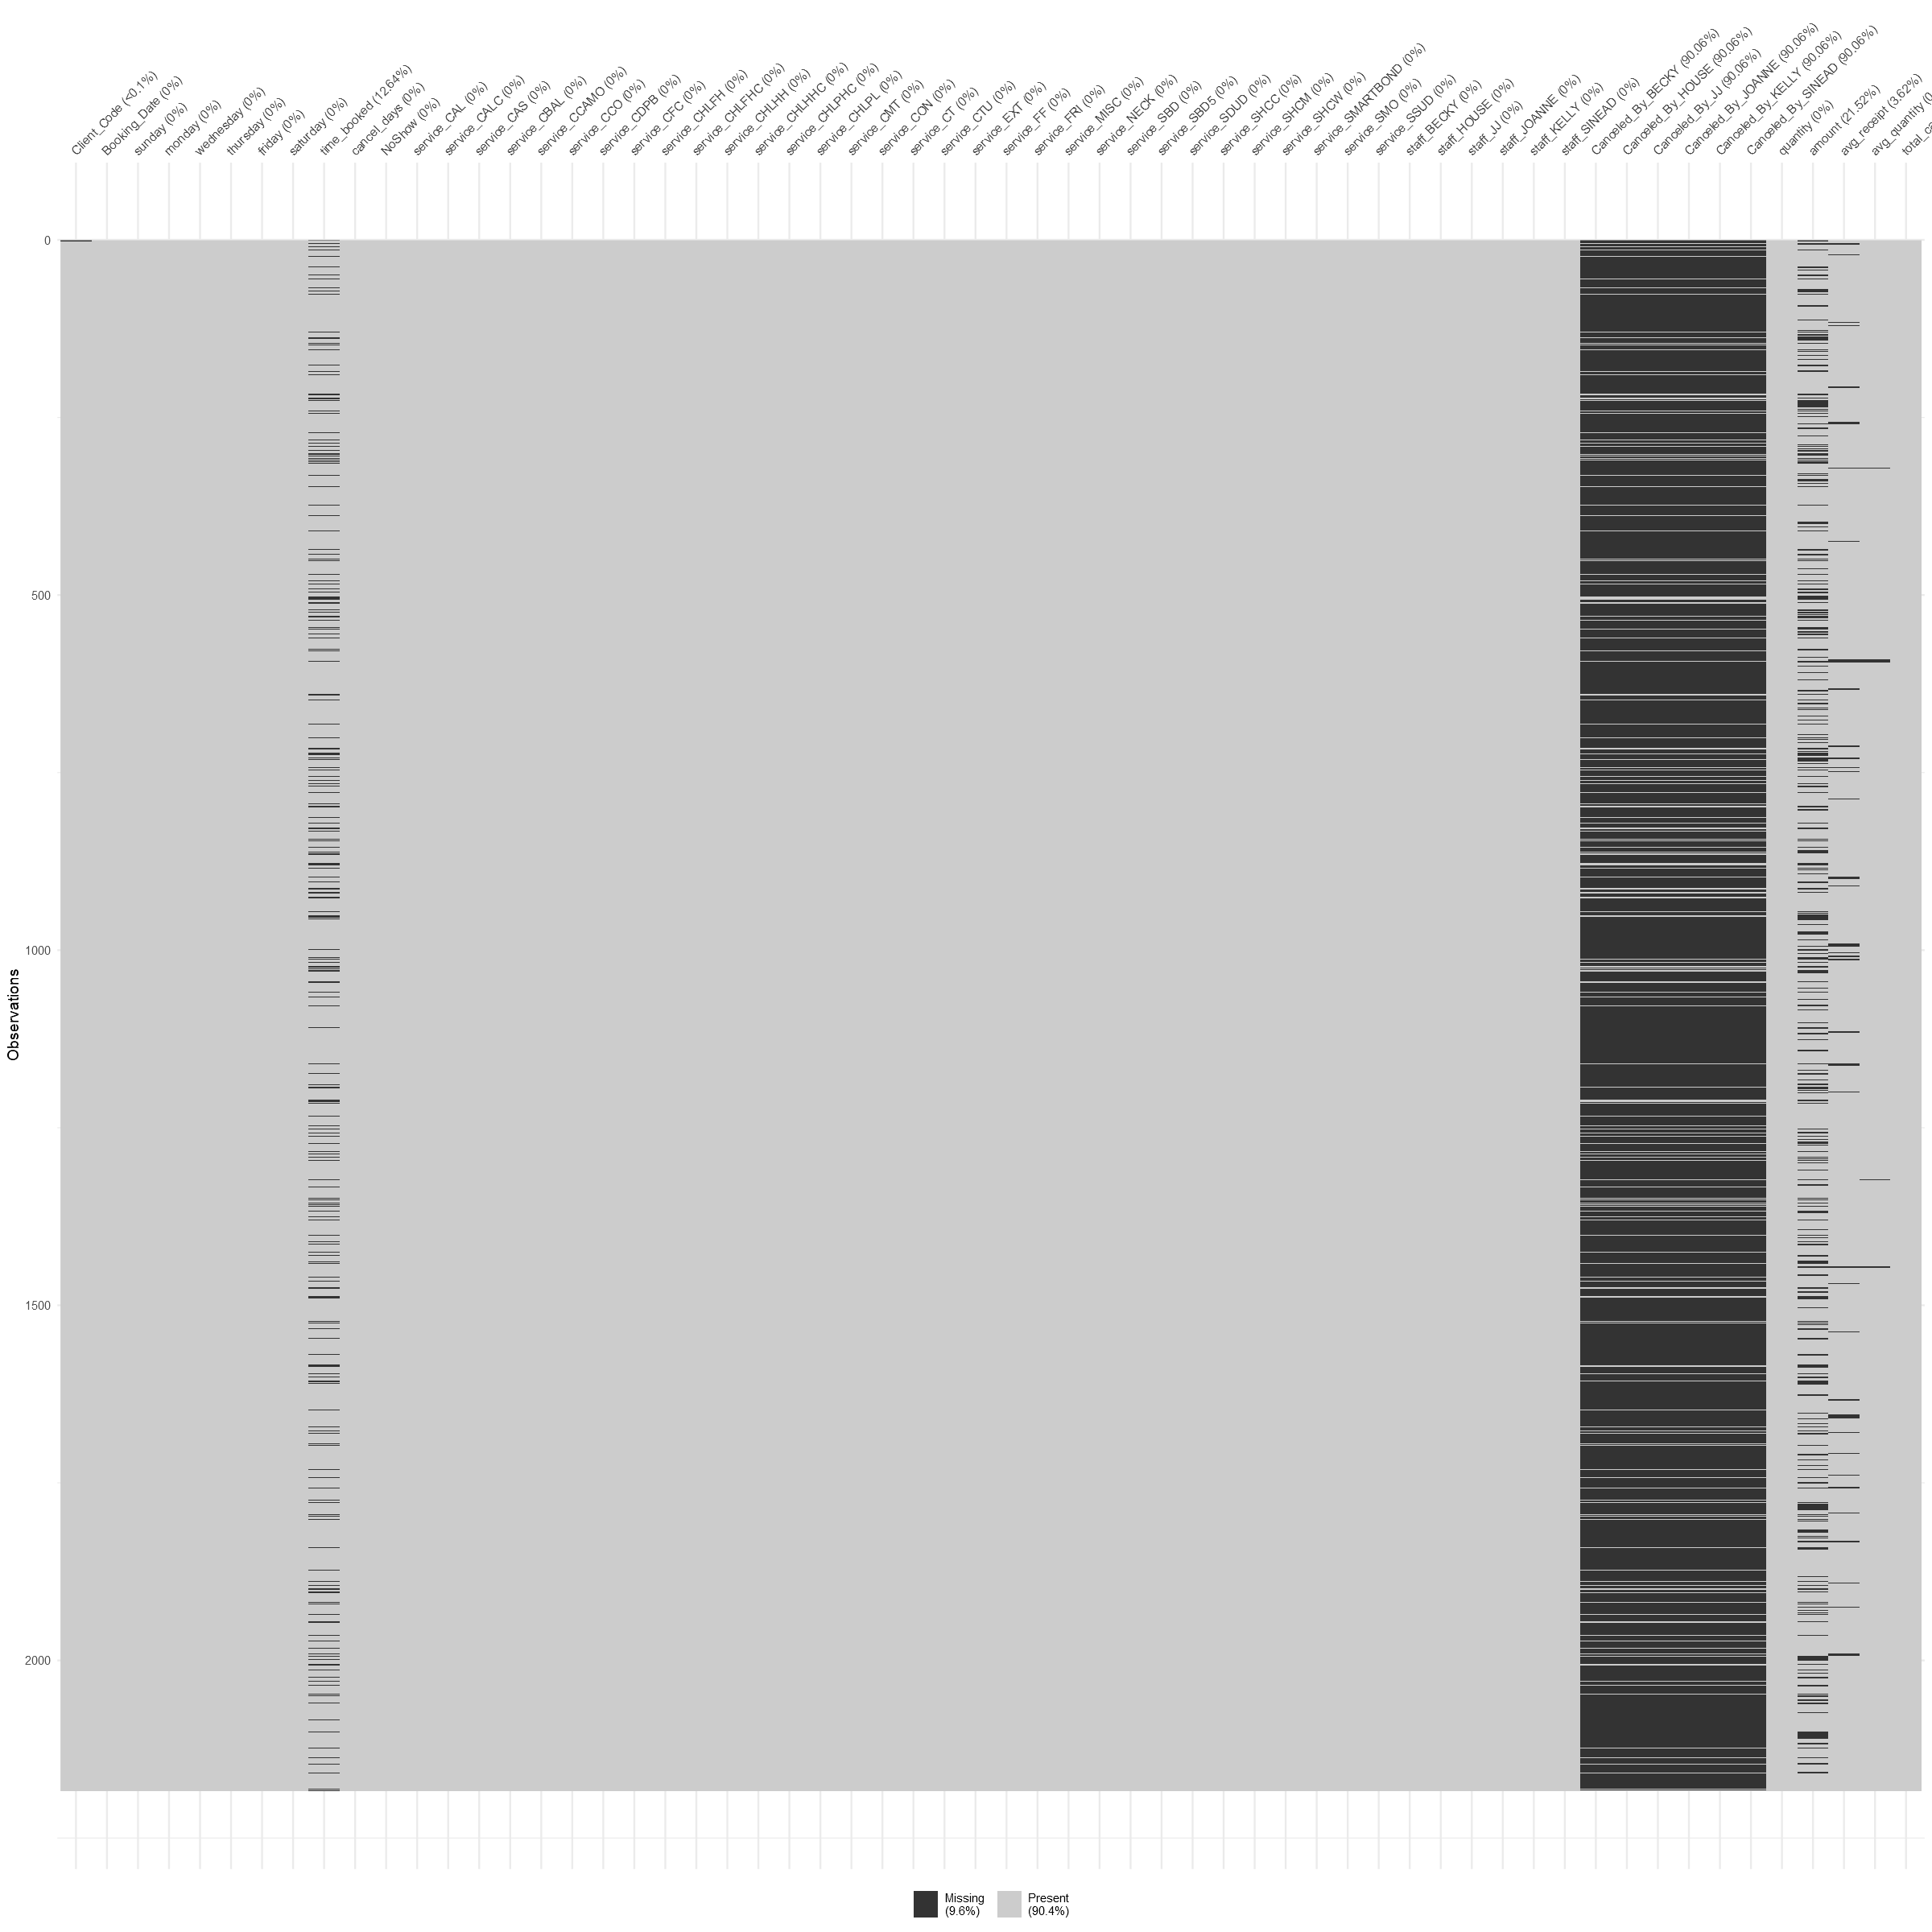

In [83]:
options(repr.plot.width = 20, repr.plot.height = 20)
vis_miss(df)

all missing in 'cancel_By_(staff)' should be 0. If the data is missing it means that it wasn't canceled by this staff member

In [84]:
table(df$Canceled_By_BECKY)
summary(df$Canceled_By_BECKY)


  0   1 
188  29 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1336  0.0000  1.0000    1967 

In [85]:
df$Canceled_By_BECKY <- ifelse(is.na(df$Canceled_By_BECKY),0,df$Canceled_By_BECKY)
table(df$Canceled_By_BECKY)


   0    1 
2155   29 

In [86]:
table(df$Canceled_By_HOUSE)
summary(df$Canceled_By_HOUSE)


  0 
217 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0       0       0       0       0    1967 

In [87]:
df$Canceled_By_HOUSE <- ifelse(is.na(df$Canceled_By_HOUSE),0,df$Canceled_By_HOUSE)
table(df$Canceled_By_HOUSE)


   0 
2184 

In [88]:
table(df$Canceled_By_JJ)
summary(df$Canceled_By_JJ)


  0   1 
124  93 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.4286  1.0000  1.0000    1967 

In [89]:
df$Canceled_By_JJ <- ifelse(is.na(df$Canceled_By_JJ),0,df$Canceled_By_JJ)
table(df$Canceled_By_JJ)


   0    1 
2091   93 

In [90]:
table(df$Canceled_By_JOANNE)
summary(df$Canceled_By_JOANNE)


  0   1 
200  17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.0783  0.0000  1.0000    1967 

In [91]:
df$Canceled_By_JOANNE <- ifelse(is.na(df$Canceled_By_JOANNE),0,df$Canceled_By_JOANNE)
table(df$Canceled_By_JOANNE)


   0    1 
2167   17 

In [92]:
table(df$Canceled_By_KELLY)
summary(df$Canceled_By_KELLY)


  0   1 
185  32 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1475  0.0000  1.0000    1967 

In [93]:
df$Canceled_By_KELLY <- ifelse(is.na(df$Canceled_By_KELLY),0,df$Canceled_By_KELLY)
table(df$Canceled_By_KELLY)


   0    1 
2152   32 

In [94]:
table(df$Canceled_By_SINEAD)
summary(df$Canceled_By_SINEAD)


  0   1 
201  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.0737  0.0000  1.0000    1967 

In [95]:
df$Canceled_By_SINEAD <- ifelse(is.na(df$Canceled_By_SINEAD),0,df$Canceled_By_SINEAD)
table(df$Canceled_By_SINEAD)


   0    1 
2168   16 

Client_Code should be primary key which cannot be missing. I will generate ranome numebr to each line (with seed)

In [96]:
if (!require("stringi")) install.packages("stringi")
set.seed(42)
df$Client_Code <- ifelse(is.na(df$Client_Code),(stri_rand_strings(2, 6, pattern = "[A-Z0-9]")),df$Client_Code)

Loading required package: stringi

Warning message:
"package 'stringi' was built under R version 3.6.2"


In [97]:
## remade the missing matrix to include the new missing values generated by the outliers treatment
df.na <- df
for(i in names(df)) {
    df.na[,i] <- ifelse(is.na(df.na[,i])==T,1,0)
}

In [98]:
missing <- getMissingness(df)
missing

list(var = c(57, 9, 58, 59), na_count = c(470, 276, 79, 11), rate = c(21.5, 12.6, 3.6, 0.5))This dataset has 1604 (73.4%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
amount,470,21.5
time_booked,276,12.6
avg_receipt,79,3.6
avg_quantity,11,0.5


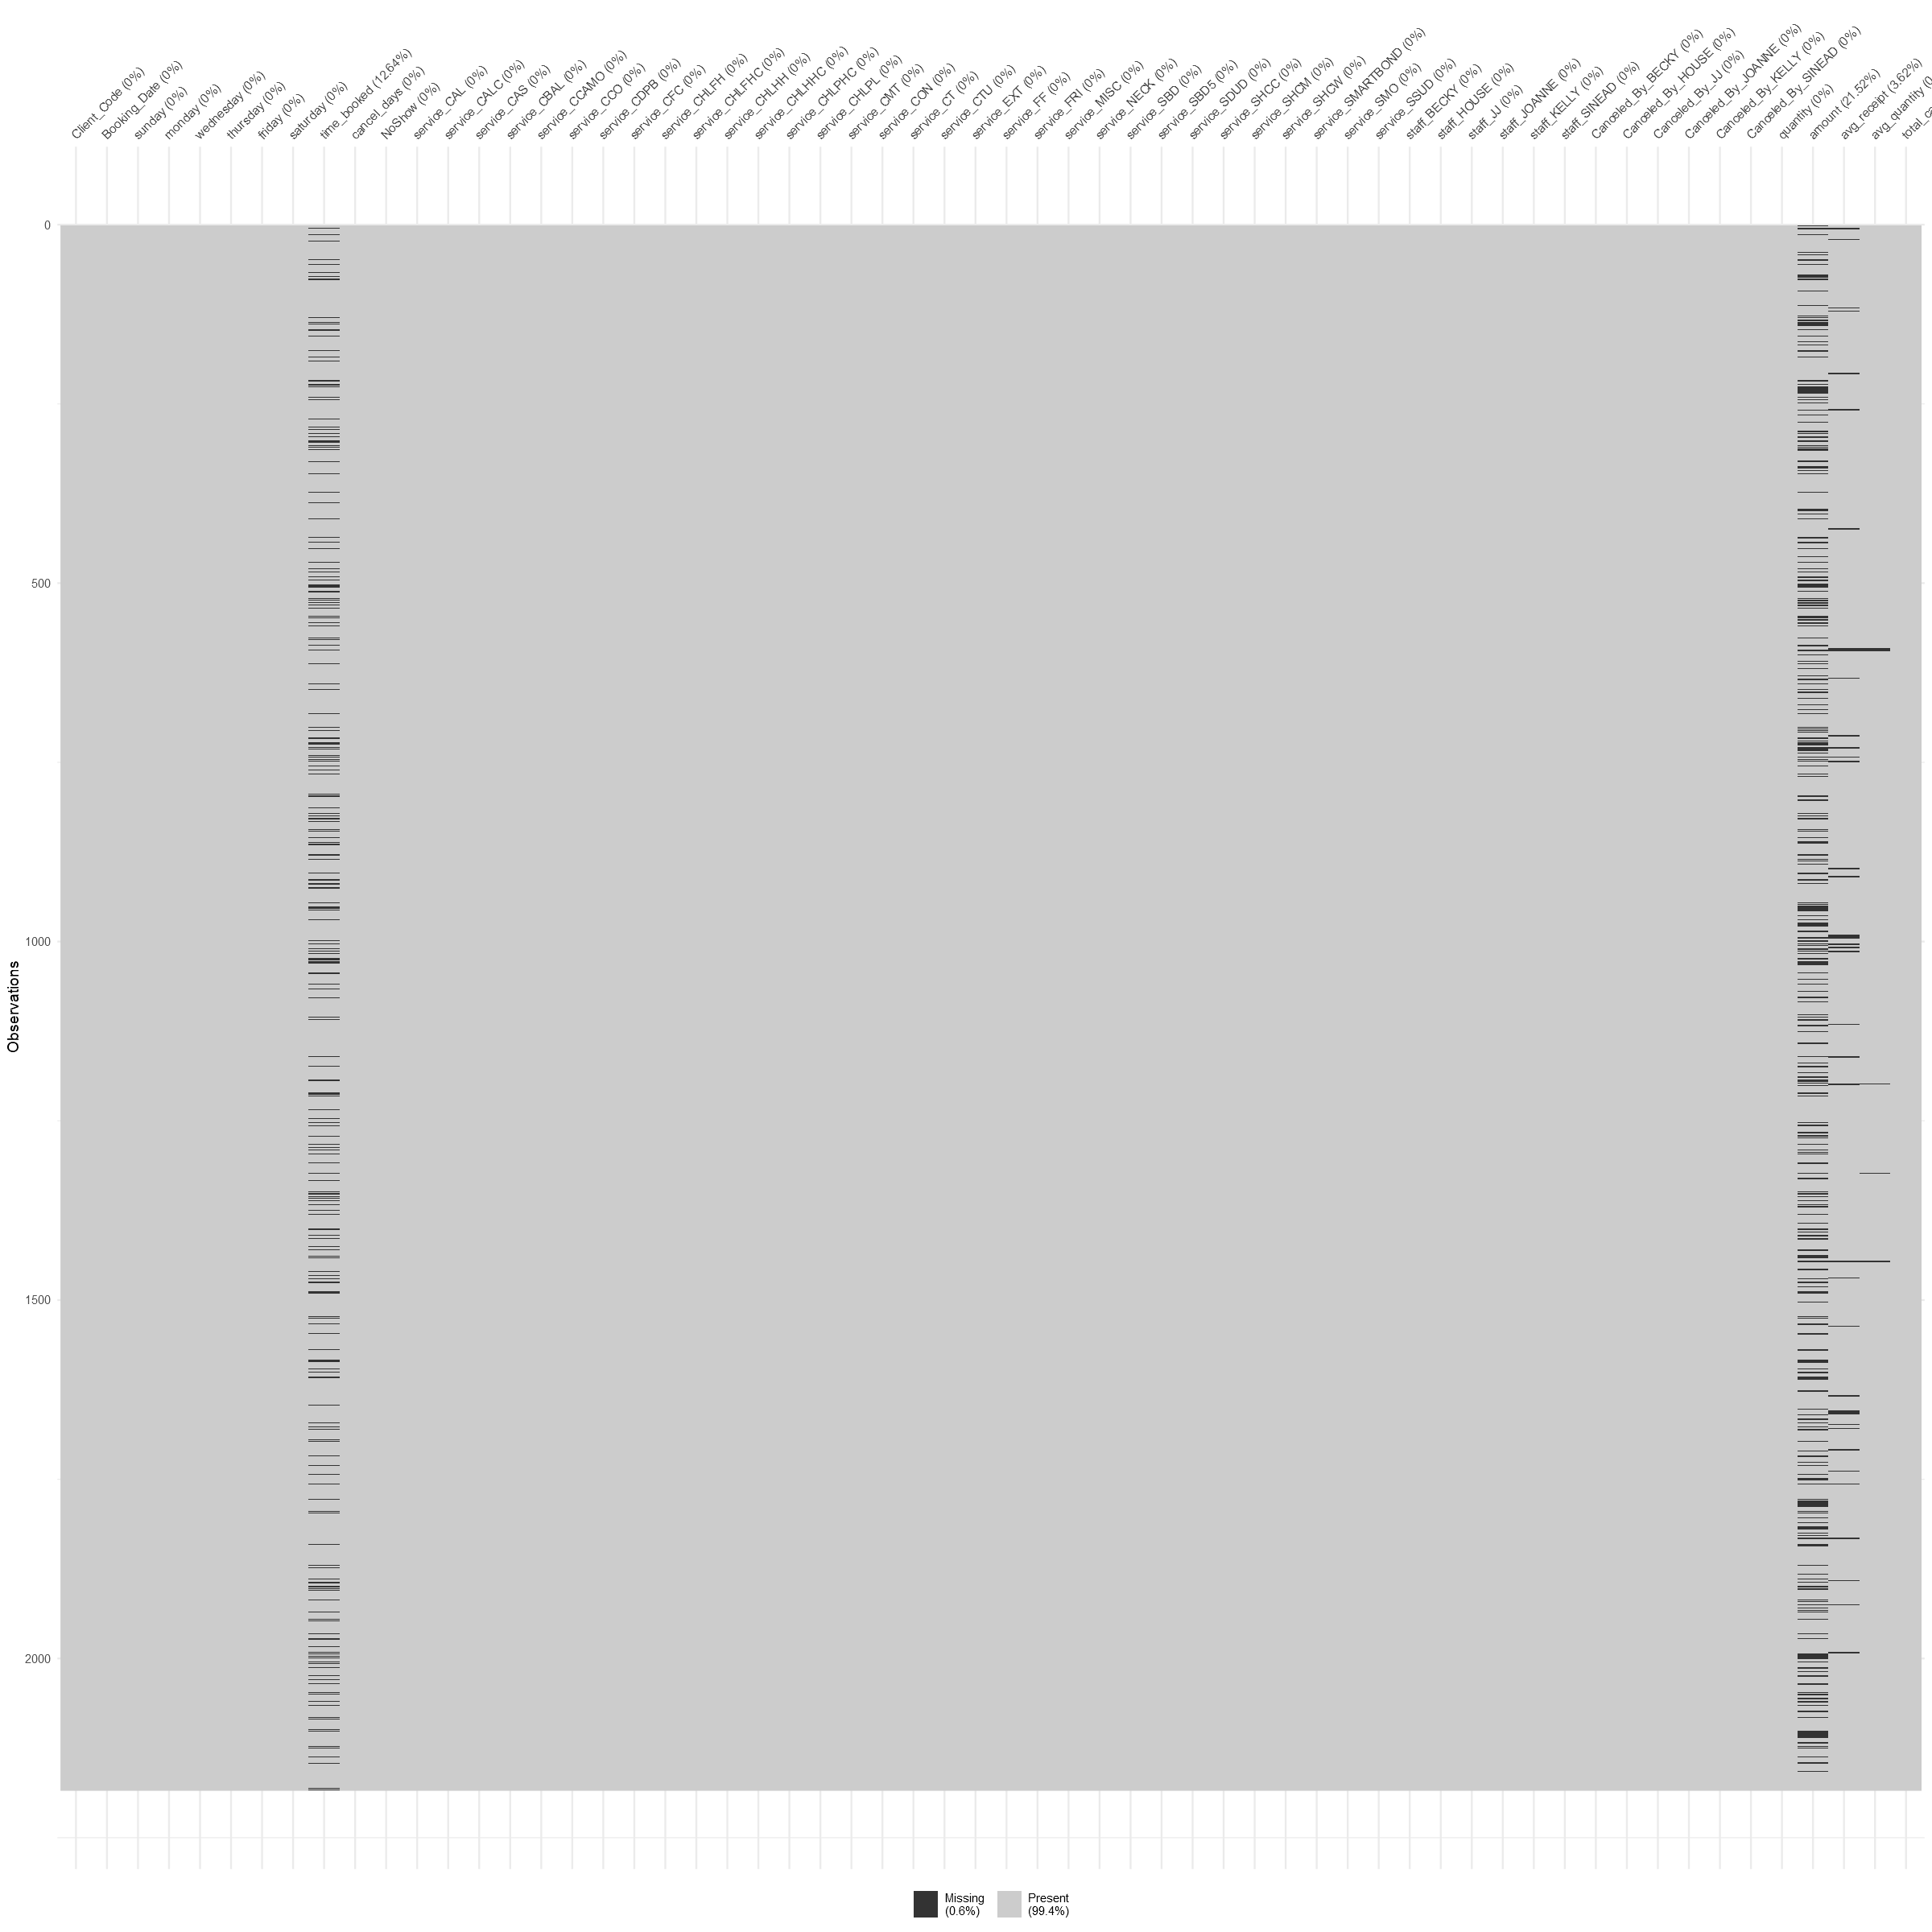

In [99]:
options(repr.plot.width = 20, repr.plot.height = 20)
vis_miss(df)

## Determinate the Missingness Generation Mechanism
 
There are three mechanisms that generate Missing values:
 
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing not at Random (MNAR)
 
We will investigate the missingness mechanisms using different techniques.


In [100]:
summary(df)

 Client_Code         Booking_Date            sunday            monday         
 Length:2184        Min.   :2018-03-14   Min.   :0.00000   Min.   :0.0000000  
 Class :character   1st Qu.:2018-05-11   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Median :2018-06-09   Median :0.00000   Median :0.0000000  
                    Mean   :2018-06-11   Mean   :0.02976   Mean   :0.0004579  
                    3rd Qu.:2018-07-12   3rd Qu.:0.00000   3rd Qu.:0.0000000  
                    Max.   :2019-02-15   Max.   :1.00000   Max.   :1.0000000  
                                                                              
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Q

Warning message:
"Removed 470 rows containing non-finite values (stat_density)."


[1] "amount by NA time_booked"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.6196, df = 55.752, p-value = 0.111
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.82680500  0.08760121
sample estimates:
mean of x mean of y 
 3.775004  4.144606 



Warning message:
"Removed 470 rows containing non-finite values (stat_density)."


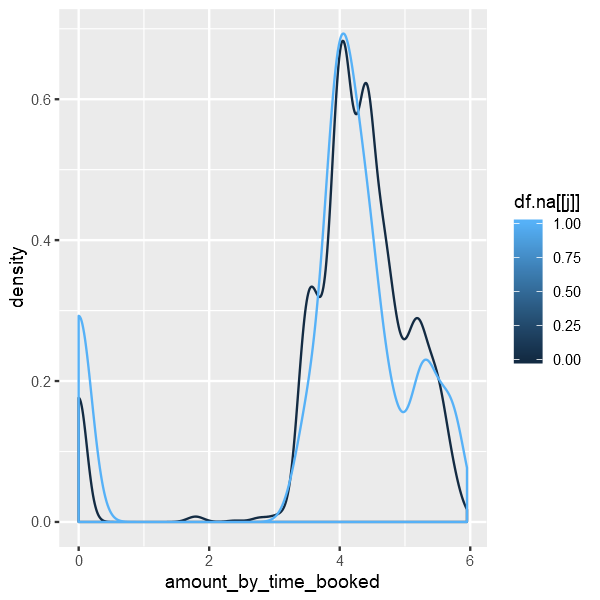

[1] "amount by NA avg_receipt"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.0375, df = 57.817, p-value = 0.3038
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2199758  0.6932991
sample estimates:
mean of x mean of y 
 4.361537  4.124875 



Warning message:
"Removed 470 rows containing non-finite values (stat_density)."


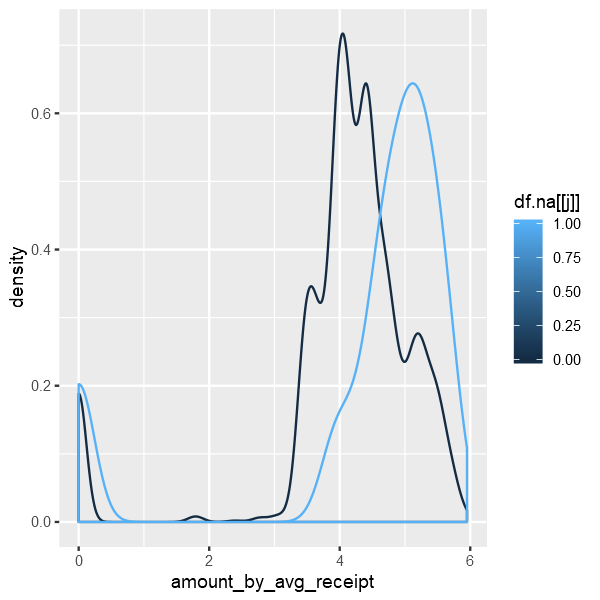

[1] "amount by NA avg_quantity"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 2.2518, df = 3.0835, p-value = 0.1074
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2178444  1.3296152
sample estimates:
mean of x mean of y 
 4.687334  4.131448 



Don't know how to automatically pick scale for object of type times. Defaulting to continuous.

Warning message:
"Removed 276 rows containing non-finite values (stat_density)."


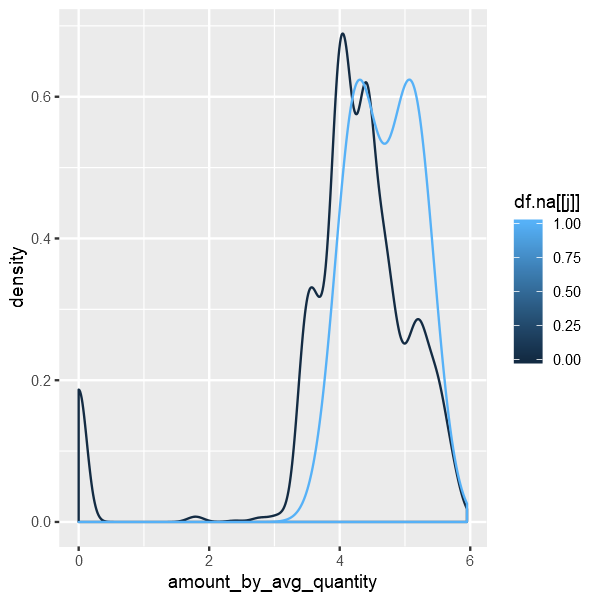

[1] "time_booked by NA amount"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -2.541297, df = 315.4, p-value = 0.0115277777777778
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.039283563 -0.004999153
sample estimates:
mean of x mean of y 
 12:58:09  13:30:02 



Don't know how to automatically pick scale for object of type times. Defaulting to continuous.

Warning message:
"Removed 276 rows containing non-finite values (stat_density)."


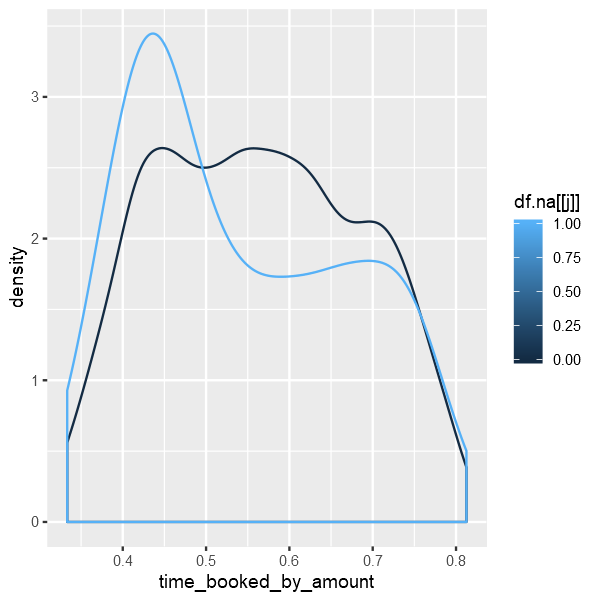

[1] "time_booked by NA avg_receipt"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -0.8368276, df = 71.741, p-value = 0.405462962962963
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03973531  0.01623938
sample estimates:
mean of x mean of y 
 13:09:33  13:26:28 



Don't know how to automatically pick scale for object of type times. Defaulting to continuous.

Warning message:
"Removed 276 rows containing non-finite values (stat_density)."


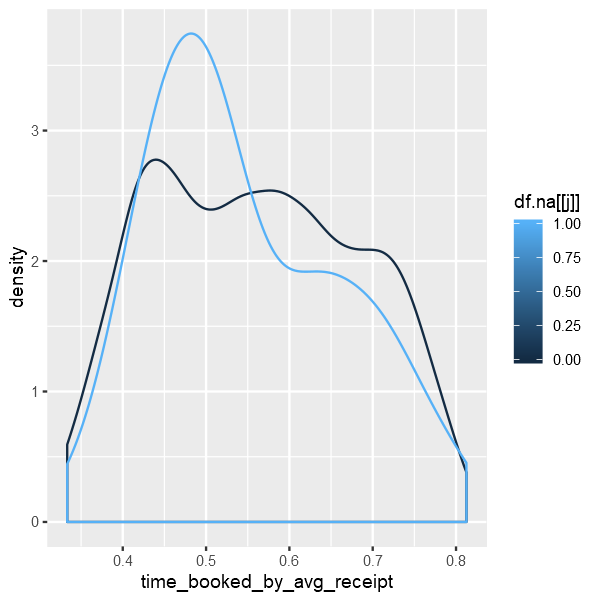

[1] "time_booked by NA avg_quantity"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.278994, df = 7.0489, p-value = 0.241388888888889
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05111948  0.17193819
sample estimates:
mean of x mean of y 
 14:52:30  13:25:31 



Warning message:
"Removed 79 rows containing non-finite values (stat_density)."


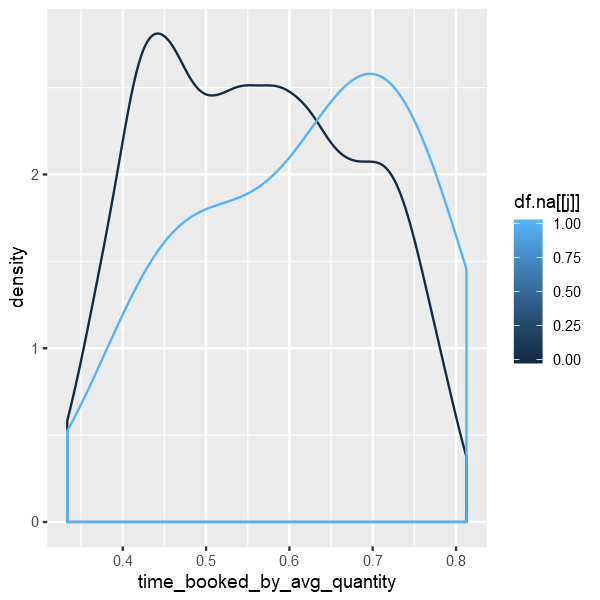

[1] "avg_receipt by NA amount"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 8.8868, df = 653.54, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 16.94121 26.55118
sample estimates:
mean of x mean of y 
 54.38401  32.63781 



Warning message:
"Removed 79 rows containing non-finite values (stat_density)."


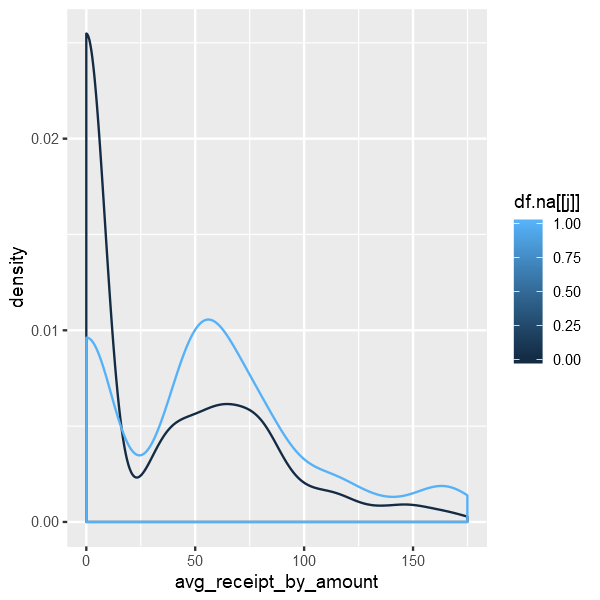

[1] "avg_receipt by NA time_booked"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 2.521, df = 343.46, p-value = 0.01215
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  1.59937 12.95288
sample estimates:
mean of x mean of y 
 43.62956  36.35344 



Warning message:
"Removed 79 rows containing non-finite values (stat_density)."
Warning message:
"Groups with fewer than two data points have been dropped."


[1] "avg_receipt by NA avg_quantity"


ERROR: Error in t.test.default(b1[[i]], b2[[i]]): not enough 'x' observations


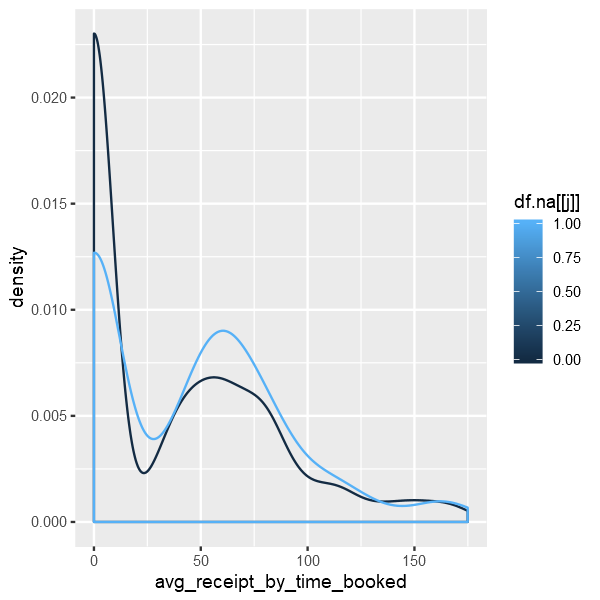

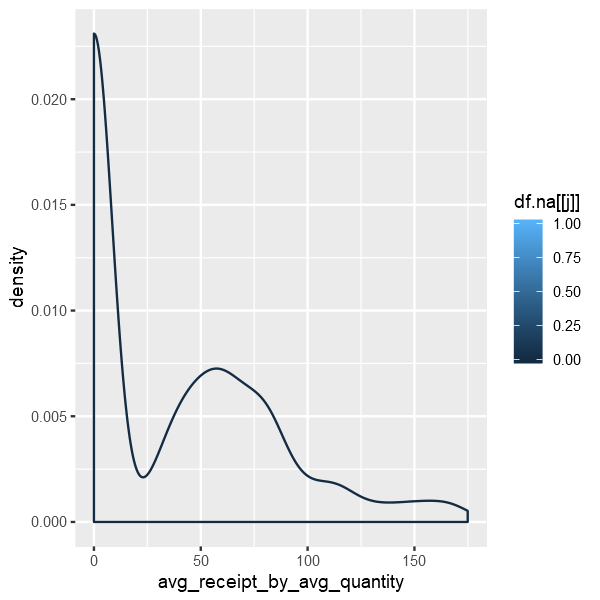

In [101]:
options(repr.plot.width = 5, repr.plot.height = 5)
for (i in (missing$missingness$var)) {
    for (j in (missing$missingness$var)) {
       if(i!=j){
           print(ggplot(df,aes(x=df[[i]],
                                     group=df.na[[j]],
                                     color=df.na[[j]]))+
                 geom_density()+
                 labs(x=paste(i,'_by_',j,sep='')))     
           b1 <- df %>% select (i,j) %>% filter(df.na[j]==1)
           b2 <- df %>% select (i,j) %>% filter(df.na[j]==0)
           print(paste(i,' by NA ', j,sep=''))
           print(t.test(b1[[i]],b2[[i]]))
           
       } 
    }
}


By the regression above and the t-test I asume that the missing mechanism is MNAR

| Variable                     | Mechanism | Treatment               |
|------------------------------|-----------|-------------------------|
| amount                       | MAR       | Imputation              |
| time_booked                  | MAR       | Imputation              |
| avg_receipt                  | MNAR      | categorize              |
| avg_quantity                 | MNAR      | categorize              |

#### Categorize avg_receipt 

In [102]:
table(df$avg_receipt)
summary(df$avg_receipt)


               0                5 13.3333333333333               15 
            1042                1                1                2 
              25               30               32             33.5 
               1               46                8                1 
           33.75               35 38.3333333333333               40 
               1               31                1               69 
              41 41.4285714285714 41.6666666666667             42.5 
               4                1                2                9 
43.3333333333333               44               45               46 
               4                2               30                4 
           46.25 46.6666666666667             46.8 46.9230769230769 
               1                6                1                9 
            47.2             47.5 47.6363636363636 47.6666666666667 
               1                1                1                1 
              48 48.1538461538462

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   30.00   37.27   67.22  174.93      79 

In [103]:
df$avg_receipt <- ifelse(is.na(df$avg_receipt),'miss',quantile(df$avg_receipt, probs = seq(0, 1, 0.25), na.rm = TRUE,
         names = TRUE))
table(df$avg_receipt)


               0 174.933333333333               30 67.2222222222222 
             844              424              420              417 
            miss 
              79 

In [104]:
table(df$avg_receipt)


               0 174.933333333333               30 67.2222222222222 
             844              424              420              417 
            miss 
              79 

#### Categorize avg_quantity

In [105]:
table(df$avg_quantity)
summary(df$avg_quantityantity)


               0                1              1.1 1.11111111111111 
            1033              596                1                2 
           1.125 1.16666666666667              1.2 1.22222222222222 
               1                2                7                3 
            1.25 1.26666666666667 1.27272727272727 1.28571428571429 
              21                3                1                4 
             1.3 1.30769230769231 1.33333333333333            1.375 
               1                1               35                3 
1.38461538461538              1.4 1.41666666666667 1.42857142857143 
               2               11                2                1 
1.44444444444444 1.45454545454545              1.5 1.55555555555556 
               2                5               76                3 
1.57142857142857              1.6            1.625 1.63636363636364 
               4                3                5                2 
1.66666666666667 1.69230769230769

Length  Class   Mode 
     0   NULL   NULL 

In [106]:
df$avg_quantity <- ifelse(is.na(df$avg_quantity),'miss',quantile(df$avg_quantity, probs = seq(0, 1, 0.25), na.rm = TRUE,
         names = TRUE))
table(df$avg_quantity)


   0    1  1.1    3 miss 
 869  435  435  434   11 

In [107]:
getMissingness(df)

list(var = c(57, 9), na_count = c(470, 276), rate = c(21.5, 12.6))This dataset has 1659 (76%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
amount,470,21.5
time_booked,276,12.6


#### Imputing the missing data using MICE

Converting time_booked to minutes

In [108]:
ch <- times(df$time_booked)
60 * hours(ch) + minutes(ch)

[1]   NA 1080  640  790   NA  660  810  990  790   NA  860 1010  930   NA
  [15]  960  840  990 1060  660  900  760  600   NA  920  700  820  840  820
  [29] 1080  720  930  750  710  670  930  660 1020   NA  960  930  780  660
  [43]  660  770  800  820 1140  640   NA  870  660  720  990 1050   NA  660
  [57] 1080  540  850 1050 1020  980  870  950  810  890   NA  700  870  600
  [71]  670   NA  600  780 1020   NA   NA 1030  840  930  820  810  600  630
  [85]  750  600  690  600  680  780  870  600  690  910  920  840  900  870
  [99]  780  930  670  990  960 1130  960 1000  870  780  780  960  600  780
 [113]  900  680  810  570  840  880  670  760  860  900  660  800  660  480
 [127]  540 1010  710   NA  600  840  660  750  560   NA 1110   NA   NA  660
 [141]  780  770  660  900  690   NA  970   NA  910  660  810  980 1110 1110
 [155]   NA  860 1020  900  960  840  840  590  900  590  610  600  540  590
 [169]  720  840  570  660  750  810  840   NA  700  810 1140  830  490 1020
 [183]  540  660   NA  780  840  500  770   NA  840  990 1020 1030  760  610
 [197]  650  660  940  870  700  900  620  720  630  720  680  770  600  810
 [211]  750  900  970  980  790  780   NA   NA  600  740   NA  960   NA   NA
 [225]  970   NA  640  840  590  840  840  840  840  840  780 1050 1080 1080
 [239] 1100  960   NA  780 1080   NA 1080  780 1080 1070 1030 1060  900  920
 [253] 1040  660  720  870  680  760  660 1030 1110 1020  780  850  540  610
 [267]  990 1020 1020 1100   NA  960  500  780  660  480  720 1030  840 1080
 [281] 1130   NA 1020  660  710   NA  760  840  890 1080   NA 1060  780 1070
 [295]  990   NA 1100  630  690 1050   NA   NA  960   NA 1000 1050 1060   NA
 [309] 1080   NA  920   NA 1030   NA  540 1020  540  480  820  890  770 1050
 [323] 1110 1140 1050 1130 1150  760  600  870   NA  900  820  600  600  720
 [337]  600  600  600  600  990  600  960  720  590  650   NA  680  910  840
 [351]  600  730  840 1140  660  920 1080 1030 1020  800  720  780  510  750
 [365]  880 1030 1140  810  910  720  530  480   NA 1140  480  510  780  590
 [379]  770  780  850  960  770  690  750  980  630   NA  630  730  540  910
 [393]  760  840  750  600  870  940  540  550  550  550  550  550 1110 1110
 [407]  630  480  490   NA  900  680  600  780  670  850  690  720  800  900
 [421]  620  810  900  810  910 1060 1000 1020  780  810  670  700  570  620
 [435] 1020   NA 1110  780  840  790 1080 1080   NA  960  720  640 1080  900
 [449]   NA 1000 1080   NA  860  900  980  960  960  760  830  660  960  500
 [463]  600 1050 1040  960  780  630  650  950   NA  900  620  900  910 1080
 [477]  560  830  840   NA 1080  670  840   NA  600  920 1010  920  780  870
 [491]   NA  840  630  680  800   NA 1050 1080  690  720  900   NA   NA   NA
 [505]   NA   NA  510  720 1140  900   NA   NA 1140 1090 1030  810  840  940
 [519]  960 1020   NA  640  660   NA  640  550   NA  570  530   NA   NA  630
 [533]  690  780   NA 1000 1020  900  950  970 1010  760  690  540  620   NA
 [547]  990   NA  540  610 1020 1120  600  840   NA  630  900  560  660   NA
 [561]  600 1020 1020 1070  760  630  660 1050  770  660  660  840  970  720
 [575] 1140   NA  990  600   NA  690  780  540  680  600  600  540   NA 1050
 [589]  630  750  600  680   NA 1050 1140 1130 1050  840  780  900  540  780
 [603]  860 1020  880 1100  590  820  900 1110 1170   NA  880  900 1050 1050
 [617]  660 1050 1050  510  540  500  600  680  960  720  780  780  790  720
 [631]  810  600  670  680  770 1040 1140  690 1110   NA   NA  480  810  870
 [645]  790  790  650   NA  660  600  900  600  700  660  590  720  750  630
 [659]  630  700  630  650  930  540  550  840  600  630  610  600  780  870
 [673]  650  600  600  670 1070 1110  990  940  890   NA 1000 1050  960 1010
 [687]  900  980  600  900  660  600  680  750  830  700 1050  660  540  980
 [701]   NA  840  960 1050  660   NA  540  620  600  690  720  580  660  550
 [715]  940   NA   NA  970  600  650 1110   NA 1070   NA   NA  930  730  870

In [109]:
time_booked<-(60 * hours(ch) + minutes(ch))
df$time_booked <- time_booked

In [110]:
init = mice(df, maxit=50, seed=123) 
meth = init$method
predM = init$predictorMatrix


 iter imp variable
  1   1  time_booked  amount
  1   2  time_booked  amount
  1   3  time_booked  amount
  1   4  time_booked  amount
  1   5  time_booked  amount
  2   1  time_booked  amount
  2   2  time_booked  amount
  2   3  time_booked  amount
  2   4  time_booked  amount
  2   5  time_booked  amount
  3   1  time_booked  amount
  3   2  time_booked  amount
  3   3  time_booked  amount
  3   4  time_booked  amount
  3   5  time_booked  amount
  4   1  time_booked  amount
  4   2  time_booked  amount
  4   3  time_booked  amount
  4   4  time_booked  amount
  4   5  time_booked  amount
  5   1  time_booked  amount
  5   2  time_booked  amount
  5   3  time_booked  amount
  5   4  time_booked  amount
  5   5  time_booked  amount
  6   1  time_booked  amount
  6   2  time_booked  amount
  6   3  time_booked  amount
  6   4  time_booked  amount
  6   5  time_booked  amount
  7   1  time_booked  amount
  7   2  time_booked  amount
  7   3  time_booked  amount
  7   4  time_booked  a

Warning message:
"Number of logged events: 510"


In [111]:
meth

Client_Code       Booking_Date             sunday             monday 
                ""                 ""                 ""                 "" 
         wednesday           thursday             friday           saturday 
                ""                 ""                 ""                 "" 
       time_booked        cancel_days             NoShow        service_CAL 
             "pmm"                 ""                 ""                 "" 
      service_CALC        service_CAS       service_CBAL      service_CCAMO 
                ""                 ""                 ""                 "" 
       service_CCO       service_CDPB        service_CFC      service_CHLFH 
                ""                 ""                 ""                 "" 
    service_CHLFHC      service_CHLHH     service_CHLHHC     service_CHLPHC 
                ""                 ""                 ""                 "" 
     service_CHLPL        service_CMT        service_CON         service_CT 
                ""                 ""                 ""                 "" 
       service_CTU        service_EXT         service_FF        service_FRI 
                ""                 ""                 ""                 "" 
      service_MISC       service_NECK        service_SBD       service_SBD5 
                ""                 ""                 ""                 "" 
      service_SDUD       service_SHCC       service_SHCM       service_SHCW 
                ""                 ""                 ""                 "" 
 service_SMARTBOND        service_SMO       service_SSUD        staff_BECKY 
                ""                 ""                 ""                 "" 
       staff_HOUSE           staff_JJ       staff_JOANNE        staff_KELLY 
                ""                 ""                 ""                 "" 
      staff_SINEAD  Canceled_By_BECKY  Canceled_By_HOUSE     Canceled_By_JJ 
                ""                 ""                 ""                 "" 
Canceled_By_JOANNE  Canceled_By_KELLY Canceled_By_SINEAD           quantity 
                ""                 ""                 ""                 "" 
            amount        avg_receipt       avg_quantity     total_cancel12 
             "pmm"                 ""                 ""                 ""

In [112]:
predM

,Client_Code,Booking_Date,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
Client_Code,0,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
Booking_Date,0,0,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
sunday,0,1,0,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
monday,0,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
wednesday,0,1,1,1,0,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
thursday,0,1,1,1,1,0,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
friday,0,1,1,1,1,1,0,1,1,0,...,0,1,1,1,1,0,1,0,0,1
saturday,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,1,0,1,0,0,1
time_booked,0,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,0,1,0,0,1
cancel_days,0,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1


In [113]:
### Predict the missing values
set.seed(123)
imputed = mice(df, method=meth, predictorMatrix=predM, m=10)


 iter imp variable
  1   1  time_booked  amount
  1   2  time_booked  amount
  1   3  time_booked  amount
  1   4  time_booked  amount
  1   5  time_booked  amount
  1   6  time_booked  amount
  1   7  time_booked  amount
  1   8  time_booked  amount
  1   9  time_booked  amount
  1   10  time_booked  amount
  2   1  time_booked  amount
  2   2  time_booked  amount
  2   3  time_booked  amount
  2   4  time_booked  amount
  2   5  time_booked  amount
  2   6  time_booked  amount
  2   7  time_booked  amount
  2   8  time_booked  amount
  2   9  time_booked  amount
  2   10  time_booked  amount
  3   1  time_booked  amount
  3   2  time_booked  amount
  3   3  time_booked  amount
  3   4  time_booked  amount
  3   5  time_booked  amount
  3   6  time_booked  amount
  3   7  time_booked  amount
  3   8  time_booked  amount
  3   9  time_booked  amount
  3   10  time_booked  amount
  4   1  time_booked  amount
  4   2  time_booked  amount
  4   3  time_booked  amount
  4   4  time_booked

Warning message:
"Number of logged events: 100"


In [114]:
summary(imputed)

Class: mids
Number of multiple imputations:  10 
Imputation methods:
       Client_Code       Booking_Date             sunday             monday 
                ""                 ""                 ""                 "" 
         wednesday           thursday             friday           saturday 
                ""                 ""                 ""                 "" 
       time_booked        cancel_days             NoShow        service_CAL 
             "pmm"                 ""                 ""                 "" 
      service_CALC        service_CAS       service_CBAL      service_CCAMO 
                ""                 ""                 ""                 "" 
       service_CCO       service_CDPB        service_CFC      service_CHLFH 
                ""                 ""                 ""                 "" 
    service_CHLFHC      service_CHLHH     service_CHLHHC     service_CHLPHC 
                ""                 ""                 ""                 "" 
     se

In [115]:
summary(imputed$imp)
imp1 <- complete(imputed,1)
dim(imp1)

                   Length Class      Mode
Client_Code        10     data.frame list
Booking_Date       10     data.frame list
sunday             10     data.frame list
monday             10     data.frame list
wednesday          10     data.frame list
thursday           10     data.frame list
friday             10     data.frame list
saturday           10     data.frame list
time_booked        10     data.frame list
cancel_days        10     data.frame list
NoShow             10     data.frame list
service_CAL        10     data.frame list
service_CALC       10     data.frame list
service_CAS        10     data.frame list
service_CBAL       10     data.frame list
service_CCAMO      10     data.frame list
service_CCO        10     data.frame list
service_CDPB       10     data.frame list
service_CFC        10     data.frame list
service_CHLFH      10     data.frame list
service_CHLFHC     10     data.frame list
service_CHLHH      10     data.frame list
service_CHLHHC     10     data.fra

[1] 2184   60

In [116]:
imputed.full <- complete(imputed,action="long")
dim(imputed.full)

[1] 21840    62

In [117]:
## Check if there are any missing on the imputed data
sapply(imputed, function(x) sum(is.na(x)))

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'language'"


data             imp               m           where          blocks 
            746               0               0               0               0 
           call            nmis          method predictorMatrix   visitSequence 
              0               0               0               0               0 
       formulas            post           blots            seed       iteration 
              0               0               0               1               0 
  lastSeedValue       chainMean        chainVar    loggedEvents         version 
              0            2900            2900               0               0 
           date 
              0

Inspecting the distribution of original (blue) and imputed data(red)

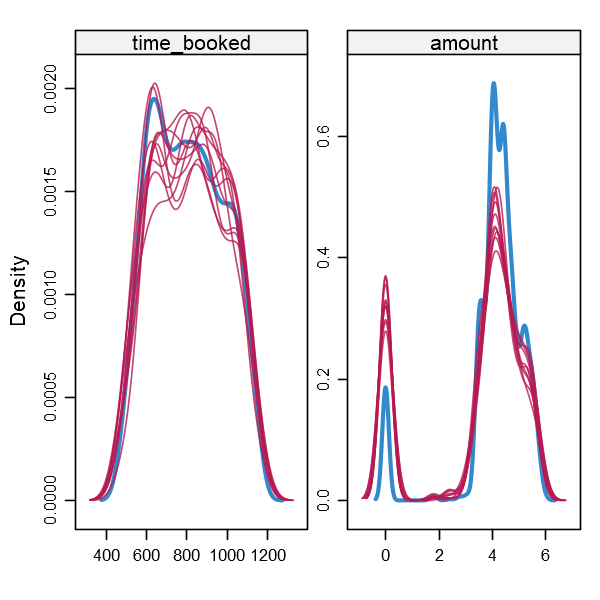

In [118]:
densityplot(imputed)

In [119]:
modelFit1 <- with(imputed,lm(time_booked~ amount))
summary(pool(modelFit1))

,estimate,std.error,statistic,df,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),790.142509,12.976875,60.888503,150.4513,0.000000
amount,4.131664,3.046044,1.356403,165.9908,0.176813


In [120]:
summary(imputed$imp$time_booked)
summary(df$time_booked)

       1                2                3                4         
 Min.   : 480.0   Min.   : 480.0   Min.   : 480.0   Min.   : 480.0  
 1st Qu.: 660.0   1st Qu.: 630.0   1st Qu.: 660.0   1st Qu.: 647.5  
 Median : 840.0   Median : 790.0   Median : 810.0   Median : 820.0  
 Mean   : 822.5   Mean   : 795.4   Mean   : 804.9   Mean   : 809.2  
 3rd Qu.: 960.0   3rd Qu.: 960.0   3rd Qu.: 942.5   3rd Qu.: 970.0  
 Max.   :1150.0   Max.   :1160.0   Max.   :1150.0   Max.   :1150.0  
       5                6                7                8         
 Min.   : 480.0   Min.   : 480.0   Min.   : 480.0   Min.   : 480.0  
 1st Qu.: 690.0   1st Qu.: 660.0   1st Qu.: 660.0   1st Qu.: 650.0  
 Median : 825.0   Median : 815.0   Median : 805.0   Median : 800.0  
 Mean   : 827.9   Mean   : 817.4   Mean   : 806.2   Mean   : 804.3  
 3rd Qu.: 970.0   3rd Qu.: 960.0   3rd Qu.: 940.0   3rd Qu.: 960.0  
 Max.   :1150.0   Max.   :1170.0   Max.   :1150.0   Max.   :1170.0  
       9                10        

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  480.0   660.0   790.0   805.9   960.0  1170.0     276 

In [121]:
imputed_comp <- complete(imputed)

In [122]:
mean(imputed_comp$time_booked)
mean(df$time_booked,na.rm=TRUE)
sd(imputed_comp$time_booked)
sd(df$time_booked,na.rm=TRUE)

[1] 807.9716

[1] 805.8753

[1] 175.008

[1] 174.9124

In [123]:
df$time_booked <- imputed_comp$time_booked

In [124]:
getMissingness(df)

list(var = 57, na_count = 470, rate = 21.5)This dataset has 1714 (78.5%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
amount,470,21.5


In [125]:
summary(imputed$imp$amount)
summary(df$amount)

       1               2               3               4        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:3.434   1st Qu.:3.434   1st Qu.:3.302   1st Qu.:3.434  
 Median :4.101   Median :4.111   Median :3.970   Median :4.025  
 Mean   :3.435   Mean   :3.422   Mean   :3.393   Mean   :3.417  
 3rd Qu.:4.635   3rd Qu.:4.635   3rd Qu.:4.635   3rd Qu.:4.635  
 Max.   :5.950   Max.   :5.763   Max.   :5.826   Max.   :5.826  
       5               6               7               8        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:3.302   1st Qu.:3.497   1st Qu.:3.434   1st Qu.:3.302  
 Median :4.111   Median :4.111   Median :4.111   Median :4.111  
 Mean   :3.454   Mean   :3.622   Mean   :3.483   Mean   :3.461  
 3rd Qu.:4.787   3rd Qu.:4.796   3rd Qu.:4.795   3rd Qu.:4.796  
 Max.   :5.861   Max.   :5.950   Max.   :5.763   Max.   :5.861  
       9               10       
 Min.   :0.000   Min.   :0.000  
 1st Qu.:3.434   1st Qu.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   3.932   4.263   4.133   4.754   5.950     470 

In [126]:
mean(imputed_comp$amount)
mean(df$amount,na.rm=TRUE)
sd(imputed_comp$amount)
sd(df$amount,na.rm=TRUE)

[1] 3.982512

[1] 4.132746

[1] 1.398027

[1] 1.19079

In [127]:
df$amount <- imputed_comp$amount

In [128]:
summary(df)

 Client_Code         Booking_Date            sunday            monday         
 Length:2184        Min.   :2018-03-14   Min.   :0.00000   Min.   :0.0000000  
 Class :character   1st Qu.:2018-05-11   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Median :2018-06-09   Median :0.00000   Median :0.0000000  
                    Mean   :2018-06-11   Mean   :0.02976   Mean   :0.0004579  
                    3rd Qu.:2018-07-12   3rd Qu.:0.00000   3rd Qu.:0.0000000  
                    Max.   :2019-02-15   Max.   :1.00000   Max.   :1.0000000  
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000 

In [129]:
getMissingness(df)

list(var = integer(0), na_count = numeric(0), rate = numeric(0))This dataset has 2184 (100%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>


In [130]:
exploreData(data=df, y='NoShow',dir="report-r-cleansed", debug=FALSE,) 

  |=================================                                     |  47%

The variable service_EXT has less than two unique values, so will not be included

The variable service_FF has less than two unique values, so will not be included



  |===================================                                   |  50%

The variable service_NECK has less than two unique values, so will not be included



  |============================================                          |  63%

The variable service_SSUD has less than two unique values, so will not be included



  |====================================================                  |  75%

The variable Canceled_By_HOUSE has less than two unique values, so will not be included



  |===============================================================       |  90%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report-r-cleansed\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

## Re-Check for Outliers

In [131]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Client_Code,sunday,monday,wednesday,thursday,friday,saturday,time_booked,NoShow,service_CAL,...,staff_KELLY,staff_SINEAD,Canceled_By_BECKY,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,amount,total_cancel12
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WXATNI,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Q4NPGP,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Choosing only continuos features for outliers re-checing

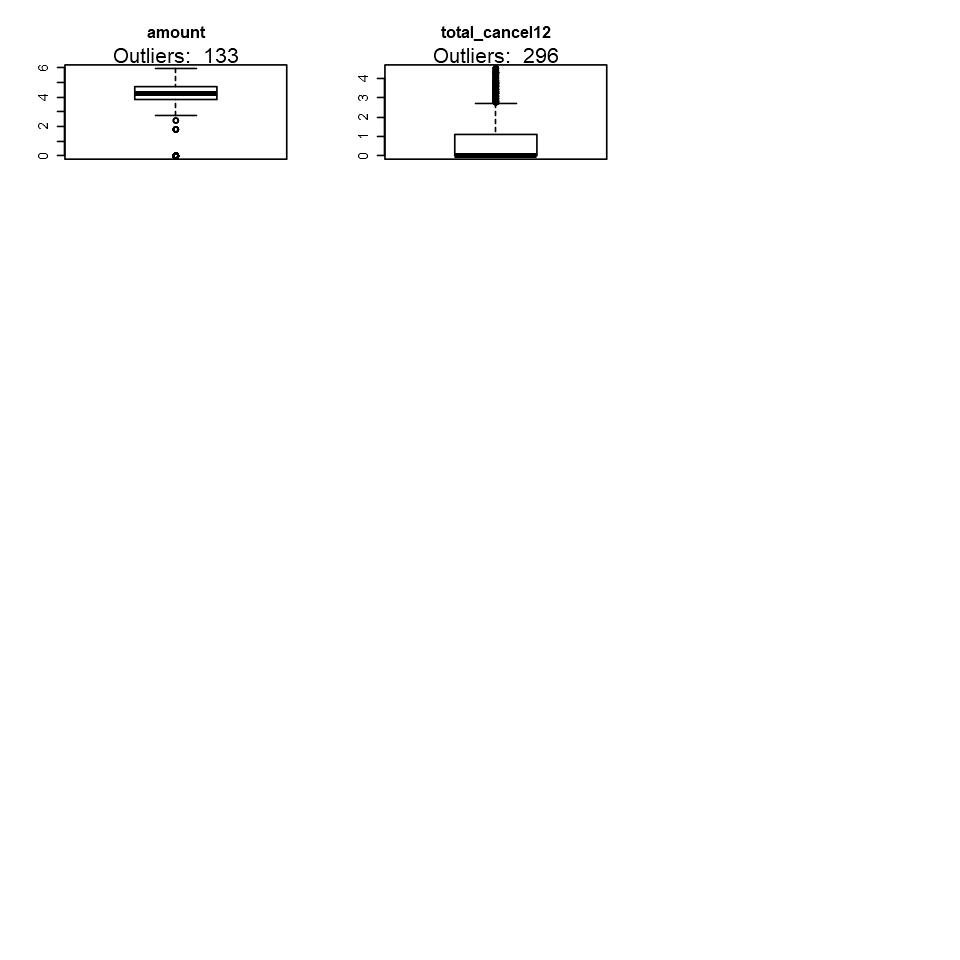

In [132]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(NOSHOW_continuousV[,c(3,6)])) {
    outlier_values <- boxplot.stats(NOSHOW_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

### Re-Checking for amount Outliers

#### amount outliers

[1] 0 0 0 0 0 0

[1] 0

[1] 2.397895

[1] 208

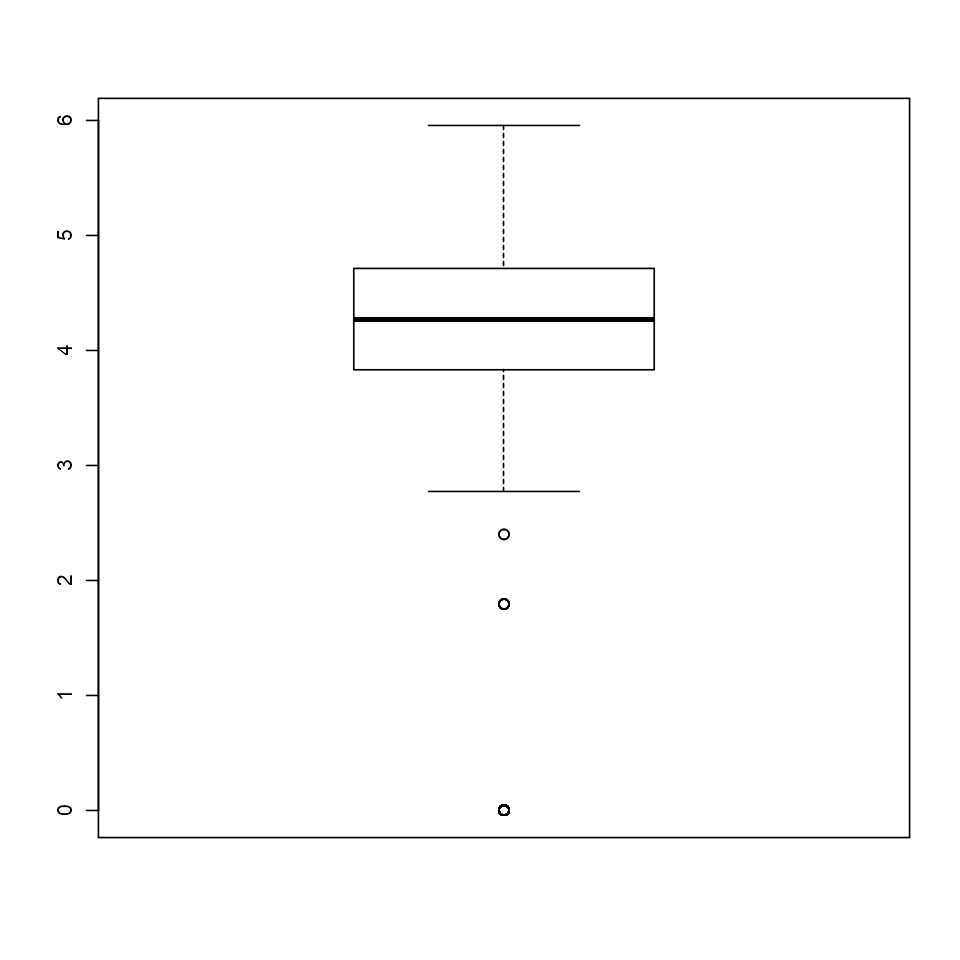

In [133]:
amount_out2  <- boxplot(df$amount)
head(amount_out2$out) # outlier
min(amount_out2$out) #  minimum outlier
max(amount_out2$out)
length(amount_out2$out)

In [134]:
amount.out2 <- ifelse(df[["amount"]] <2.40 , 1, 0)
table(amount.out2)

amount.out2
   0    1 
1976  208 

In [135]:
amount.noout2 <- df[["amount"]]
amount.noout2 <- ifelse(amount.out2==1,NA,amount.noout2)
head(amount.noout2)

[1] 5.382199 4.418841 5.572154 5.572154 3.583519 4.418841

Warning message:
"Removed 208 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 208 rows containing non-finite values (stat_density)."


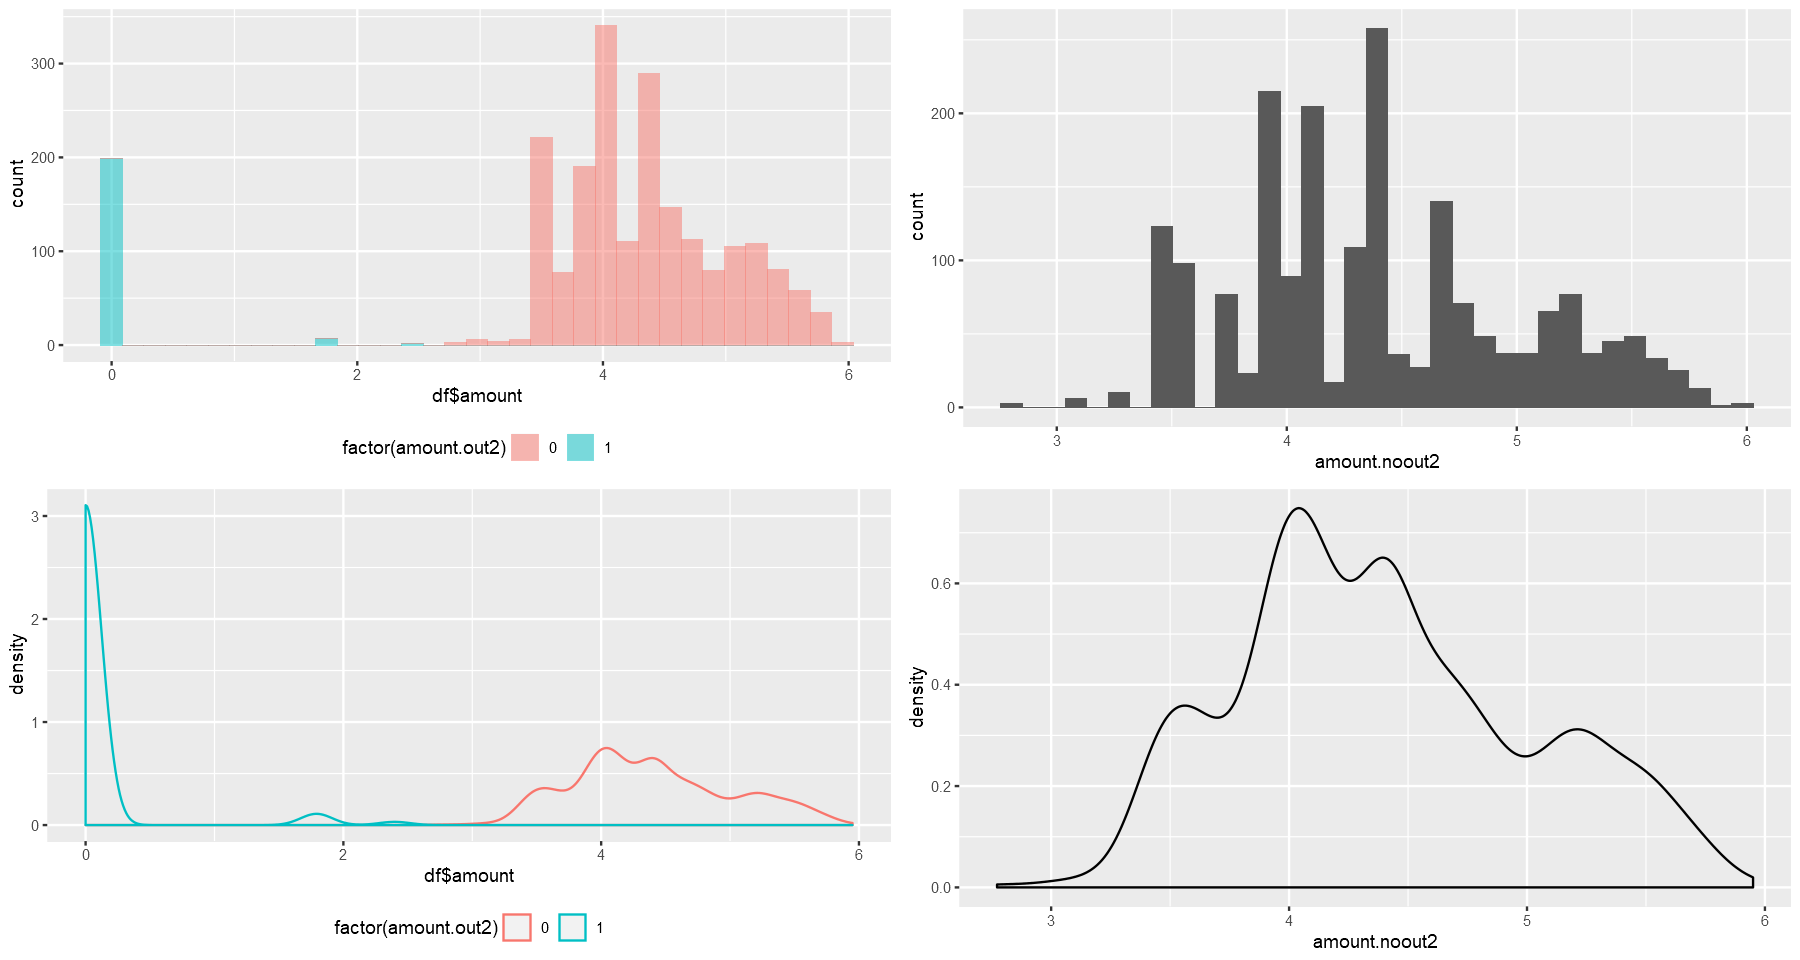

In [136]:
p1 <- ggplot() + geom_histogram(aes(x=df$amount, fill=factor(amount.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=amount.noout2),bins=35)
p3 <- ggplot (df,aes(x=df$amount, group = factor(amount.out2), color = factor(amount.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=amount.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [137]:
t.test(amount.out2,amount.noout2)


	Welch Two Sample t-test

data:  amount.out2 and amount.noout2
t = -284.12, df = 2775.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.327372 -4.268051
sample estimates:
mean of x mean of y 
0.0952381 4.3929497 


In [138]:
mod5 <- glm(df$NoShow ~ df$amount,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ amount.noout2,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

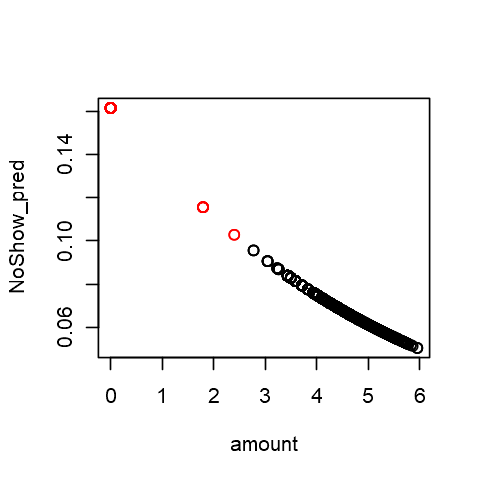

In [139]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$amount, pred5, col=factor(amount.out2),xlab="amount",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [140]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1840
     1  136

In [141]:
mod1a <- glm(df$NoShow ~ df$amount,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$amount+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$amount+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

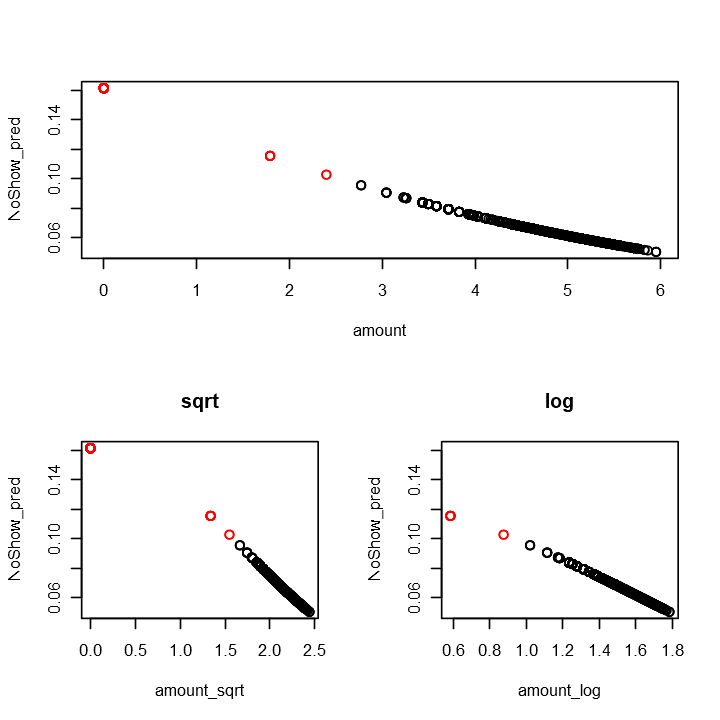

In [142]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$amount, pred5, col=factor(amount.out2),xlab="amount",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$amount), pred5, col=factor(amount.out2),xlab="amount_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$amount), pred5, col=factor(amount.out2),xlab="amount_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

no need to transform this feature againg

### Re-Checking for total_cancel12 Outliers

#### total_cancel12 outliers

[1] 2.944439 3.218876 3.433987 3.610918 3.761200 3.891820

[1] 2.772589

[1] 4.51086

[1] 164

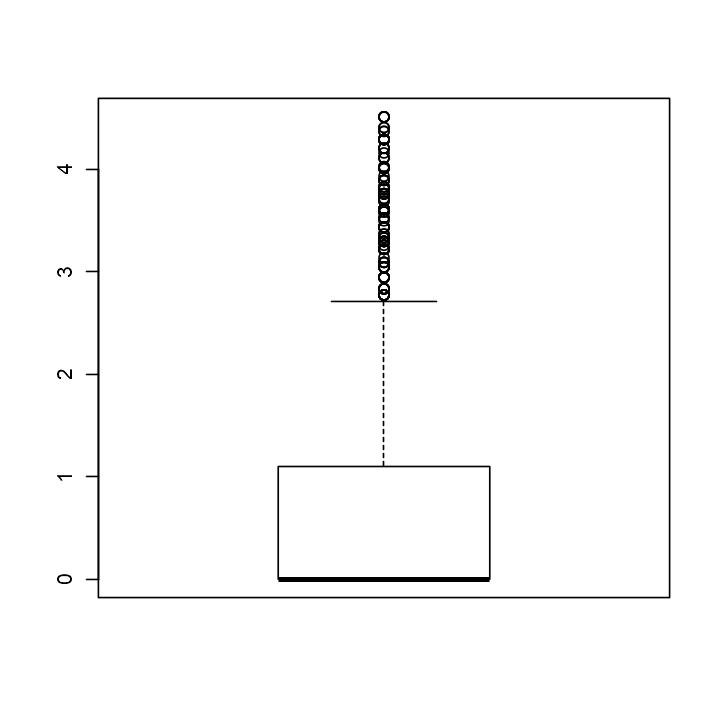

In [156]:
total_cancel12_out2  <- boxplot(df$total_cancel12)
head(total_cancel12_out2$out) # outlier
min(total_cancel12_out2$out) #  minimum outlier
max(total_cancel12_out2$out)
length(total_cancel12_out2$out)

In [158]:
total_cancel12.out2 <- ifelse(df[["total_cancel12"]] <2.77 , 1, 0)
table(total_cancel12.out2)

total_cancel12.out2
   0    1 
 164 2020 

In [159]:
total_cancel12.noout2 <- df[["total_cancel12"]]
total_cancel12.noout2 <- ifelse(total_cancel12.out2==1,NA,total_cancel12.noout2)
head(total_cancel12.noout2)

[1] NA NA NA NA NA NA

Warning message:
"Removed 2020 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2020 rows containing non-finite values (stat_density)."


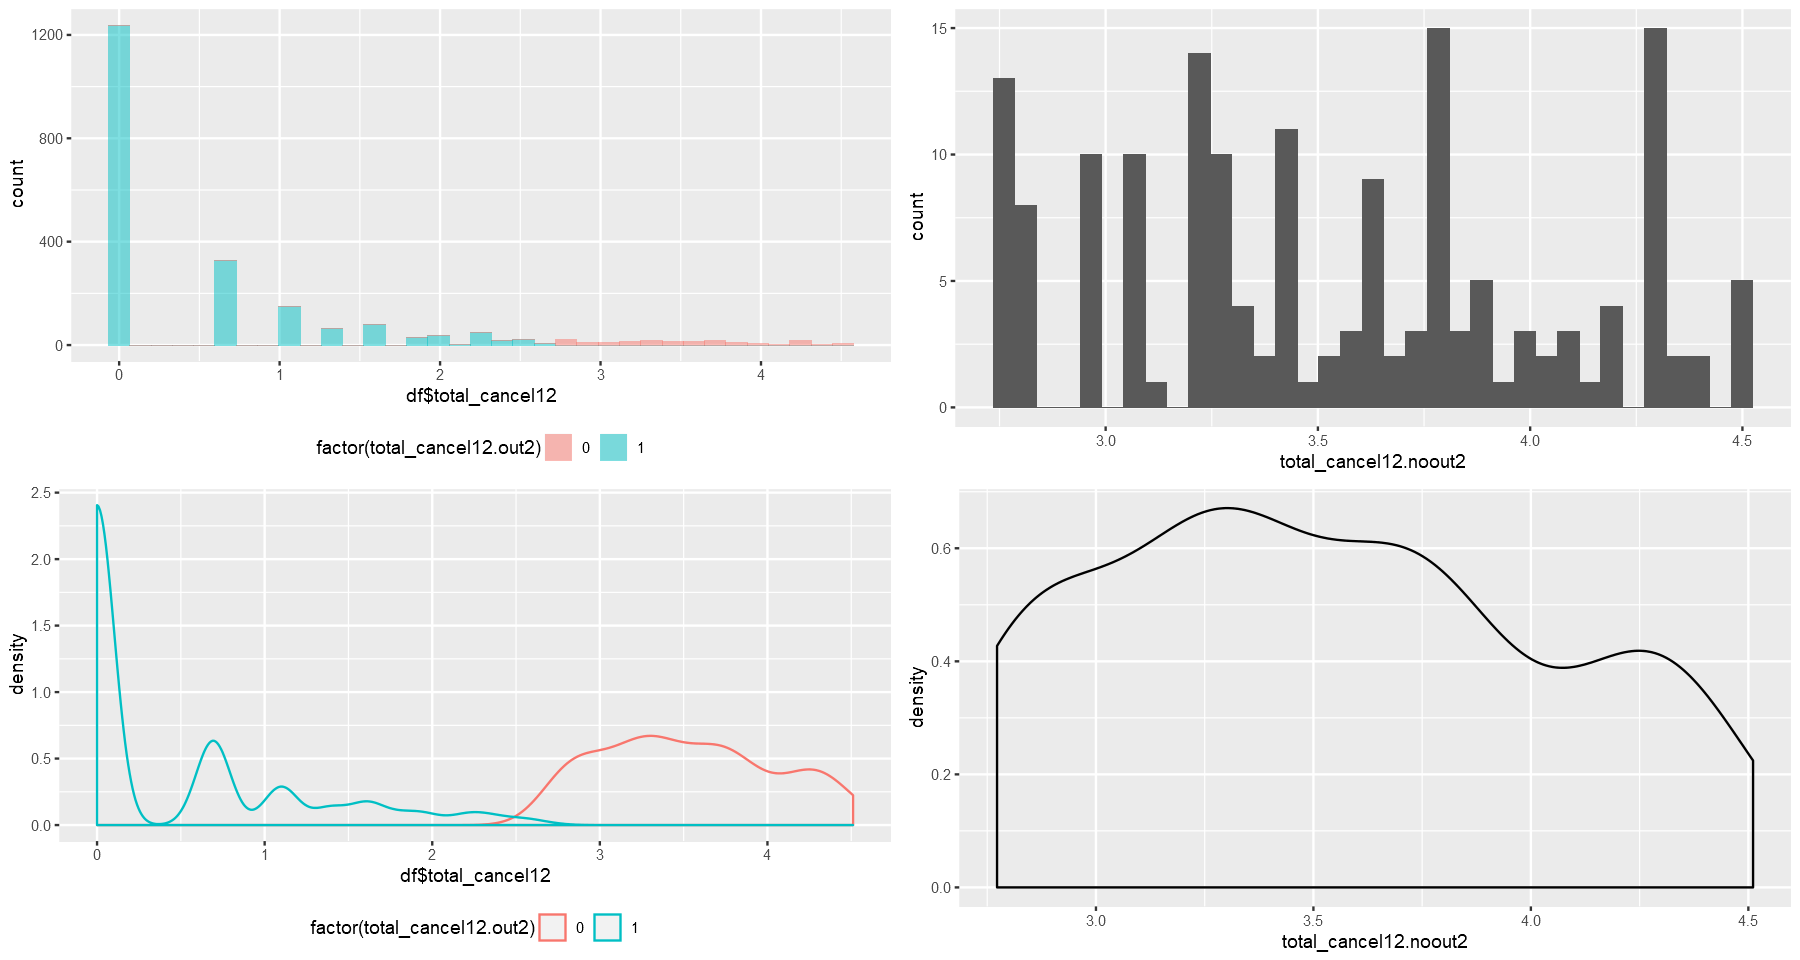

In [160]:
p1 <- ggplot() + geom_histogram(aes(x=df$total_cancel12, fill=factor(total_cancel12.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=total_cancel12.noout2),bins=35)
p3 <- ggplot (df,aes(x=df$total_cancel12, group = factor(total_cancel12.out2), color = factor(total_cancel12.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=total_cancel12.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [161]:
t.test(total_cancel12.out2,total_cancel12.noout2)


	Welch Two Sample t-test

data:  total_cancel12.out2 and total_cancel12.noout2
t = -64.874, df = 169.61, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.686696 -2.528018
sample estimates:
mean of x mean of y 
0.9249084 3.5322653 


In [162]:
mod5 <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ total_cancel12.noout2,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

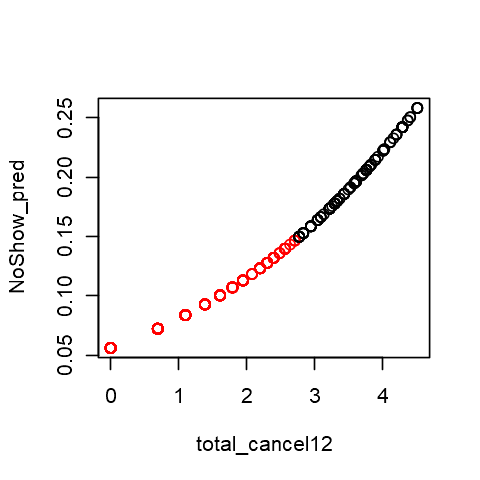

In [163]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$total_cancel12, pred5, col=factor(total_cancel12.out2),xlab="total_cancel12",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [150]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1840
     1  136

In [164]:
mod1a <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$total_cancel12+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$total_cancel12+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

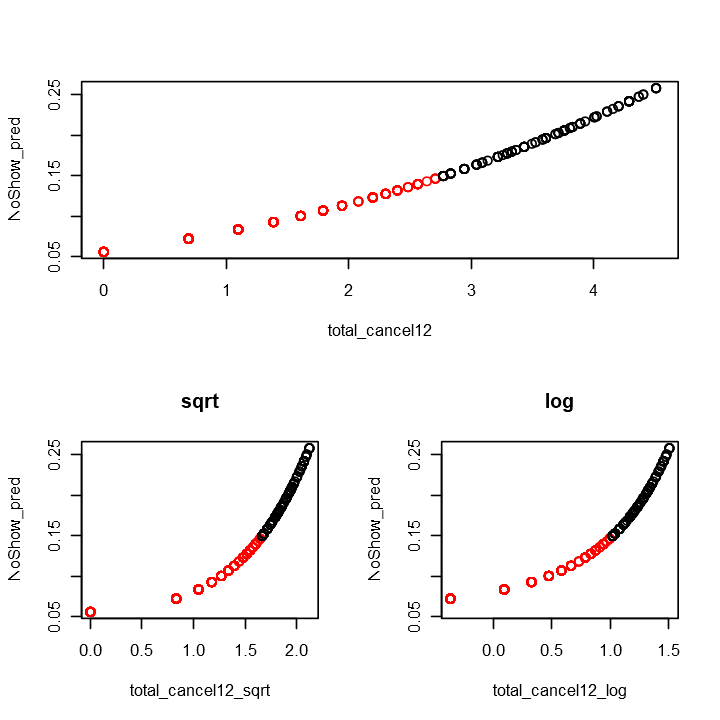

In [165]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$total_cancel12, pred5, col=factor(total_cancel12.out2),xlab="total_cancel12",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$total_cancel12), pred5, col=factor(total_cancel12.out2),xlab="total_cancel12_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$total_cancel12), pred5, col=factor(total_cancel12.out2),xlab="total_cancel12_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

no need to transform this feature againg

In [153]:
write.csv(df,"C:\\Users\\Mayer\\Documents\\DataScience\\project\\Noshows\\NoShowCleansedDF.csv")